## Assignment 7: Exploring the General Social Survey--Lab Notebook

**Name: Zunda Xu (zunda@uchicago.edu)**

The General Social Survey (GSS) gathers data on American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes. It is conducted biannually through in-person interviews using a probability sampling approach. It is one of the most commonly studied datasets in the social science disciplines.

In this assignment, we will conduct an exploratory analysis of the 2012 GSS data. 

Before starting our analysis, let us import the necessary modules first

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Then let us read the data file, which is named "gss2012.csv". And take a look at the shape and format of this dataset.

In [2]:
gss_2012 = pd.read_csv("gss2012.csv")

In [3]:
gss_2012.shape
gss_2012.head()

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
0,2012,1.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,1.0,0.0,22.0,4 years,...,Nonsouth,More difficult,22.0,0.0,0.0,NaN,<=30,Catholic,0.0,NaN
1,2012,2.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,2.0,0.0,21.0,12th grade,...,Nonsouth,NaN,21.0,0.0,0.0,100.0,<=30,Catholic,0.0,7.0
2,2012,3.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Married,1.0,2.0,42.0,12th grade,...,Nonsouth,NaN,42.0,1.0,100.0,100.0,>=31,Protestant,0.0,10.0
3,2012,4.0,NaN,SOMEONE ELSE,PRIVATE,Married,2.0,2.0,49.0,1 yr coll,...,Nonsouth,Same/easier,49.0,NaN,NaN,100.0,>=31,Protestant,0.0,NaN
4,2012,5.0,RETIRED,SOMEONE ELSE,GOVERNMENT,Separated,0.0,3.0,70.0,4 years,...,Nonsouth,Same/easier,70.0,NaN,NaN,0.0,>=31,Protestant,1.0,4.0


After having a basic understanding of this dataset, we will start our exploration of the GSS data.
First of all, we will figure out the distributions of some demographic characteristics of those samples, such as gender, race, working status, degree and etc.

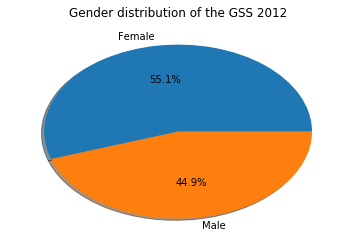

In [4]:
gss_gender = gss_2012.groupby('sex').size()
plt.pie(gss_gender.values, labels = gss_gender.index, autopct='%1.1f%%', shadow=True)
plt.title("Gender distribution of the GSS 2012")
plt.show()

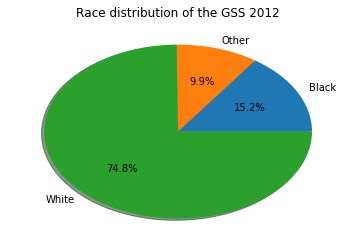

In [5]:
gss_race = gss_2012.groupby('race').size()
plt.pie(gss_race.values, labels = gss_race.index, autopct='%1.1f%%', shadow=True)
plt.title("Race distribution of the GSS 2012")
plt.show()

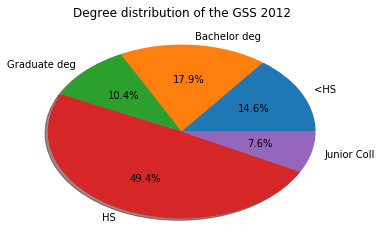

In [6]:
gss_degree = gss_2012.groupby('degree').size()
plt.pie(gss_degree.values, labels = gss_degree.index, autopct='%1.1f%%', shadow=True)
plt.title("Degree distribution of the GSS 2012")
plt.show()

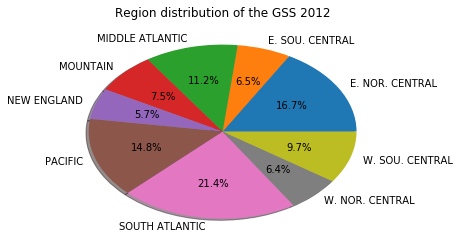

In [7]:
gss_region = gss_2012.groupby('region').size()
plt.pie(gss_region.values, labels = gss_region.index, autopct='%1.1f%%', shadow=True)
plt.title("Region distribution of the GSS 2012")
plt.show()

As the code and graphs shown above, we first choose four basic demographic characteristics of those respondents, which is gender, race, highest degree and rigion, and we use four pie charts to show the distribution of those variables in this dataset respectively. From those pie chart, we find the female respondents account for 55.1%, while the male respondents account for the rest 44.9%. About the race, around three fourths of respondents are white. About the respondents' highest degree, around half of the respondents only finished high school, while the respondents with higher education level(e.g. bachelor degree and graduate degree) accounts for 28.3%. The last pie chart is the region distribution, the respondents come from 9 regions, and the top 3 regions that respondents come from are South Atlantic, East North Central and Pacific.
Obviously, we can get a lot of pie charts using the same method, and the goal of doing these graphs is to make preparation for our further analysis. To some extent,knowing the basic distribution of the sample is really important for us to analysis the variation or covariation between variables.

Next, we will focus on the income situation of those respondents. There are two related variables in this dataset, "income06" stands for the total family income of each respondent, and "rinco06" represents the individual income of each respondents. We will first analyze the "income06".

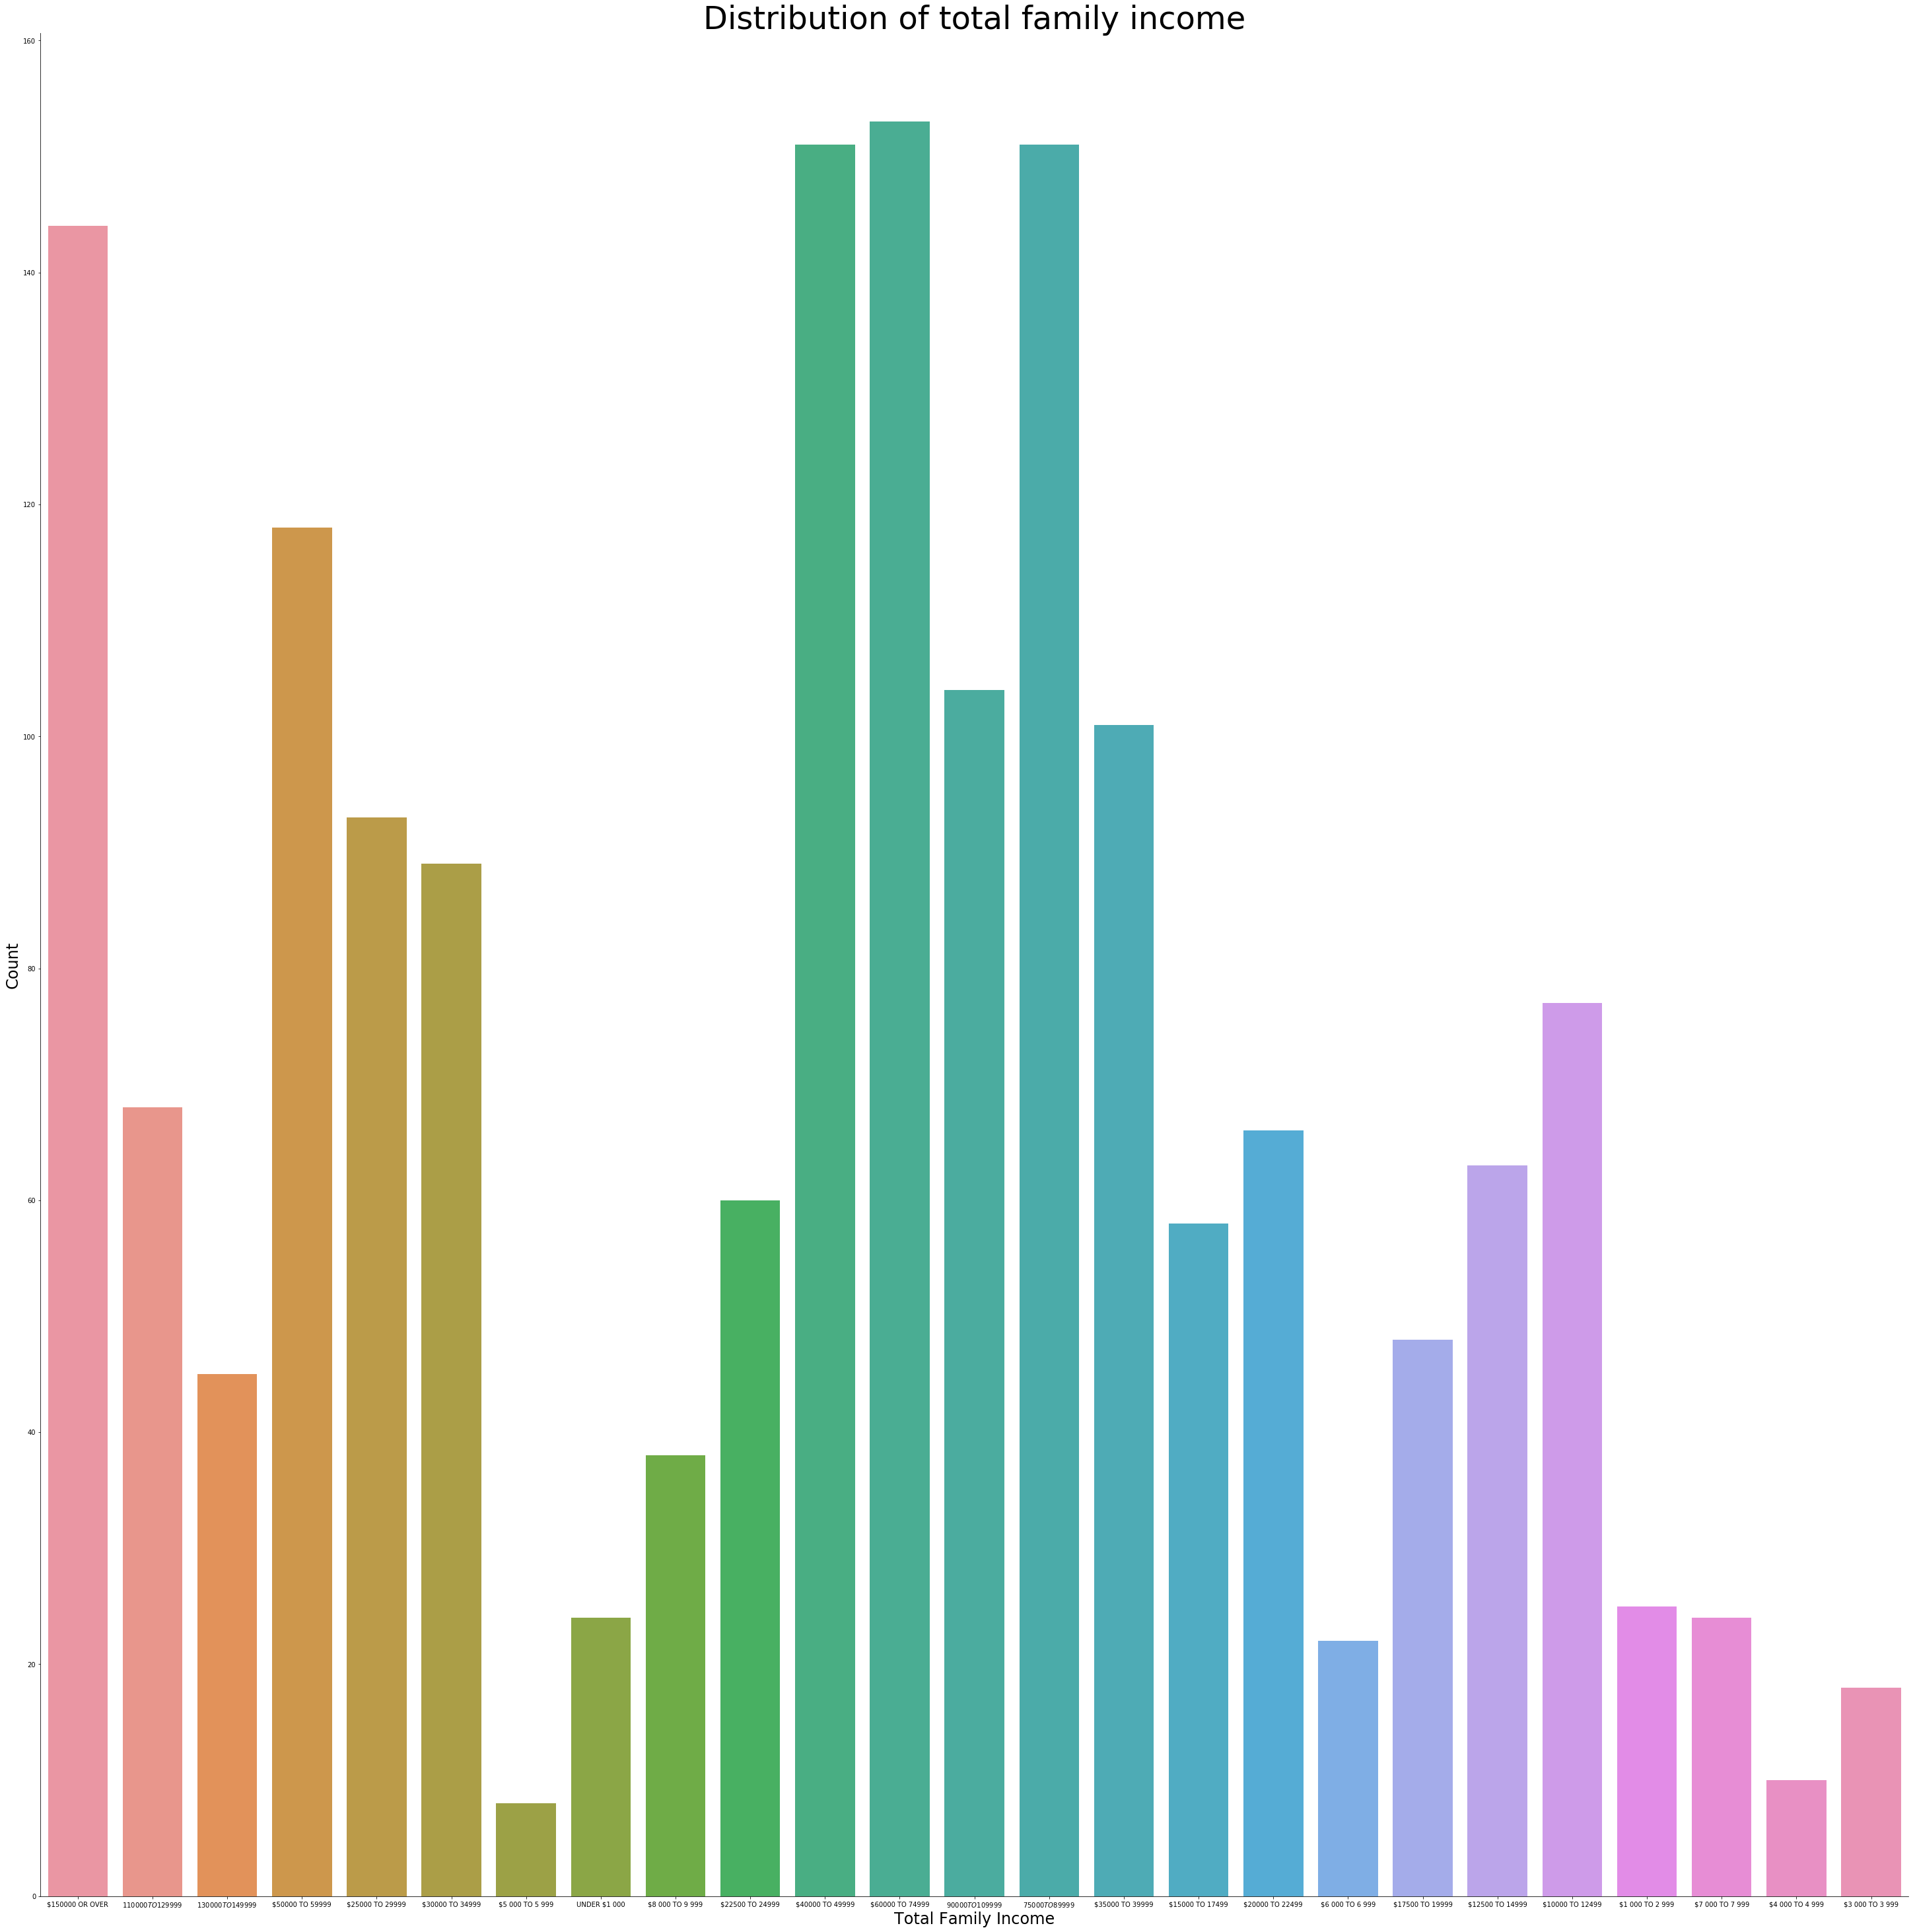

In [11]:
g = sns.factorplot('income06', kind='count', data=gss_2012, size=40)# the overall distribution of total family income
plt.title("Distribution of total family income", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show() 

After knowing the overall distribution of respondents' total family income, we then compare the respondents' total family income by their working status.

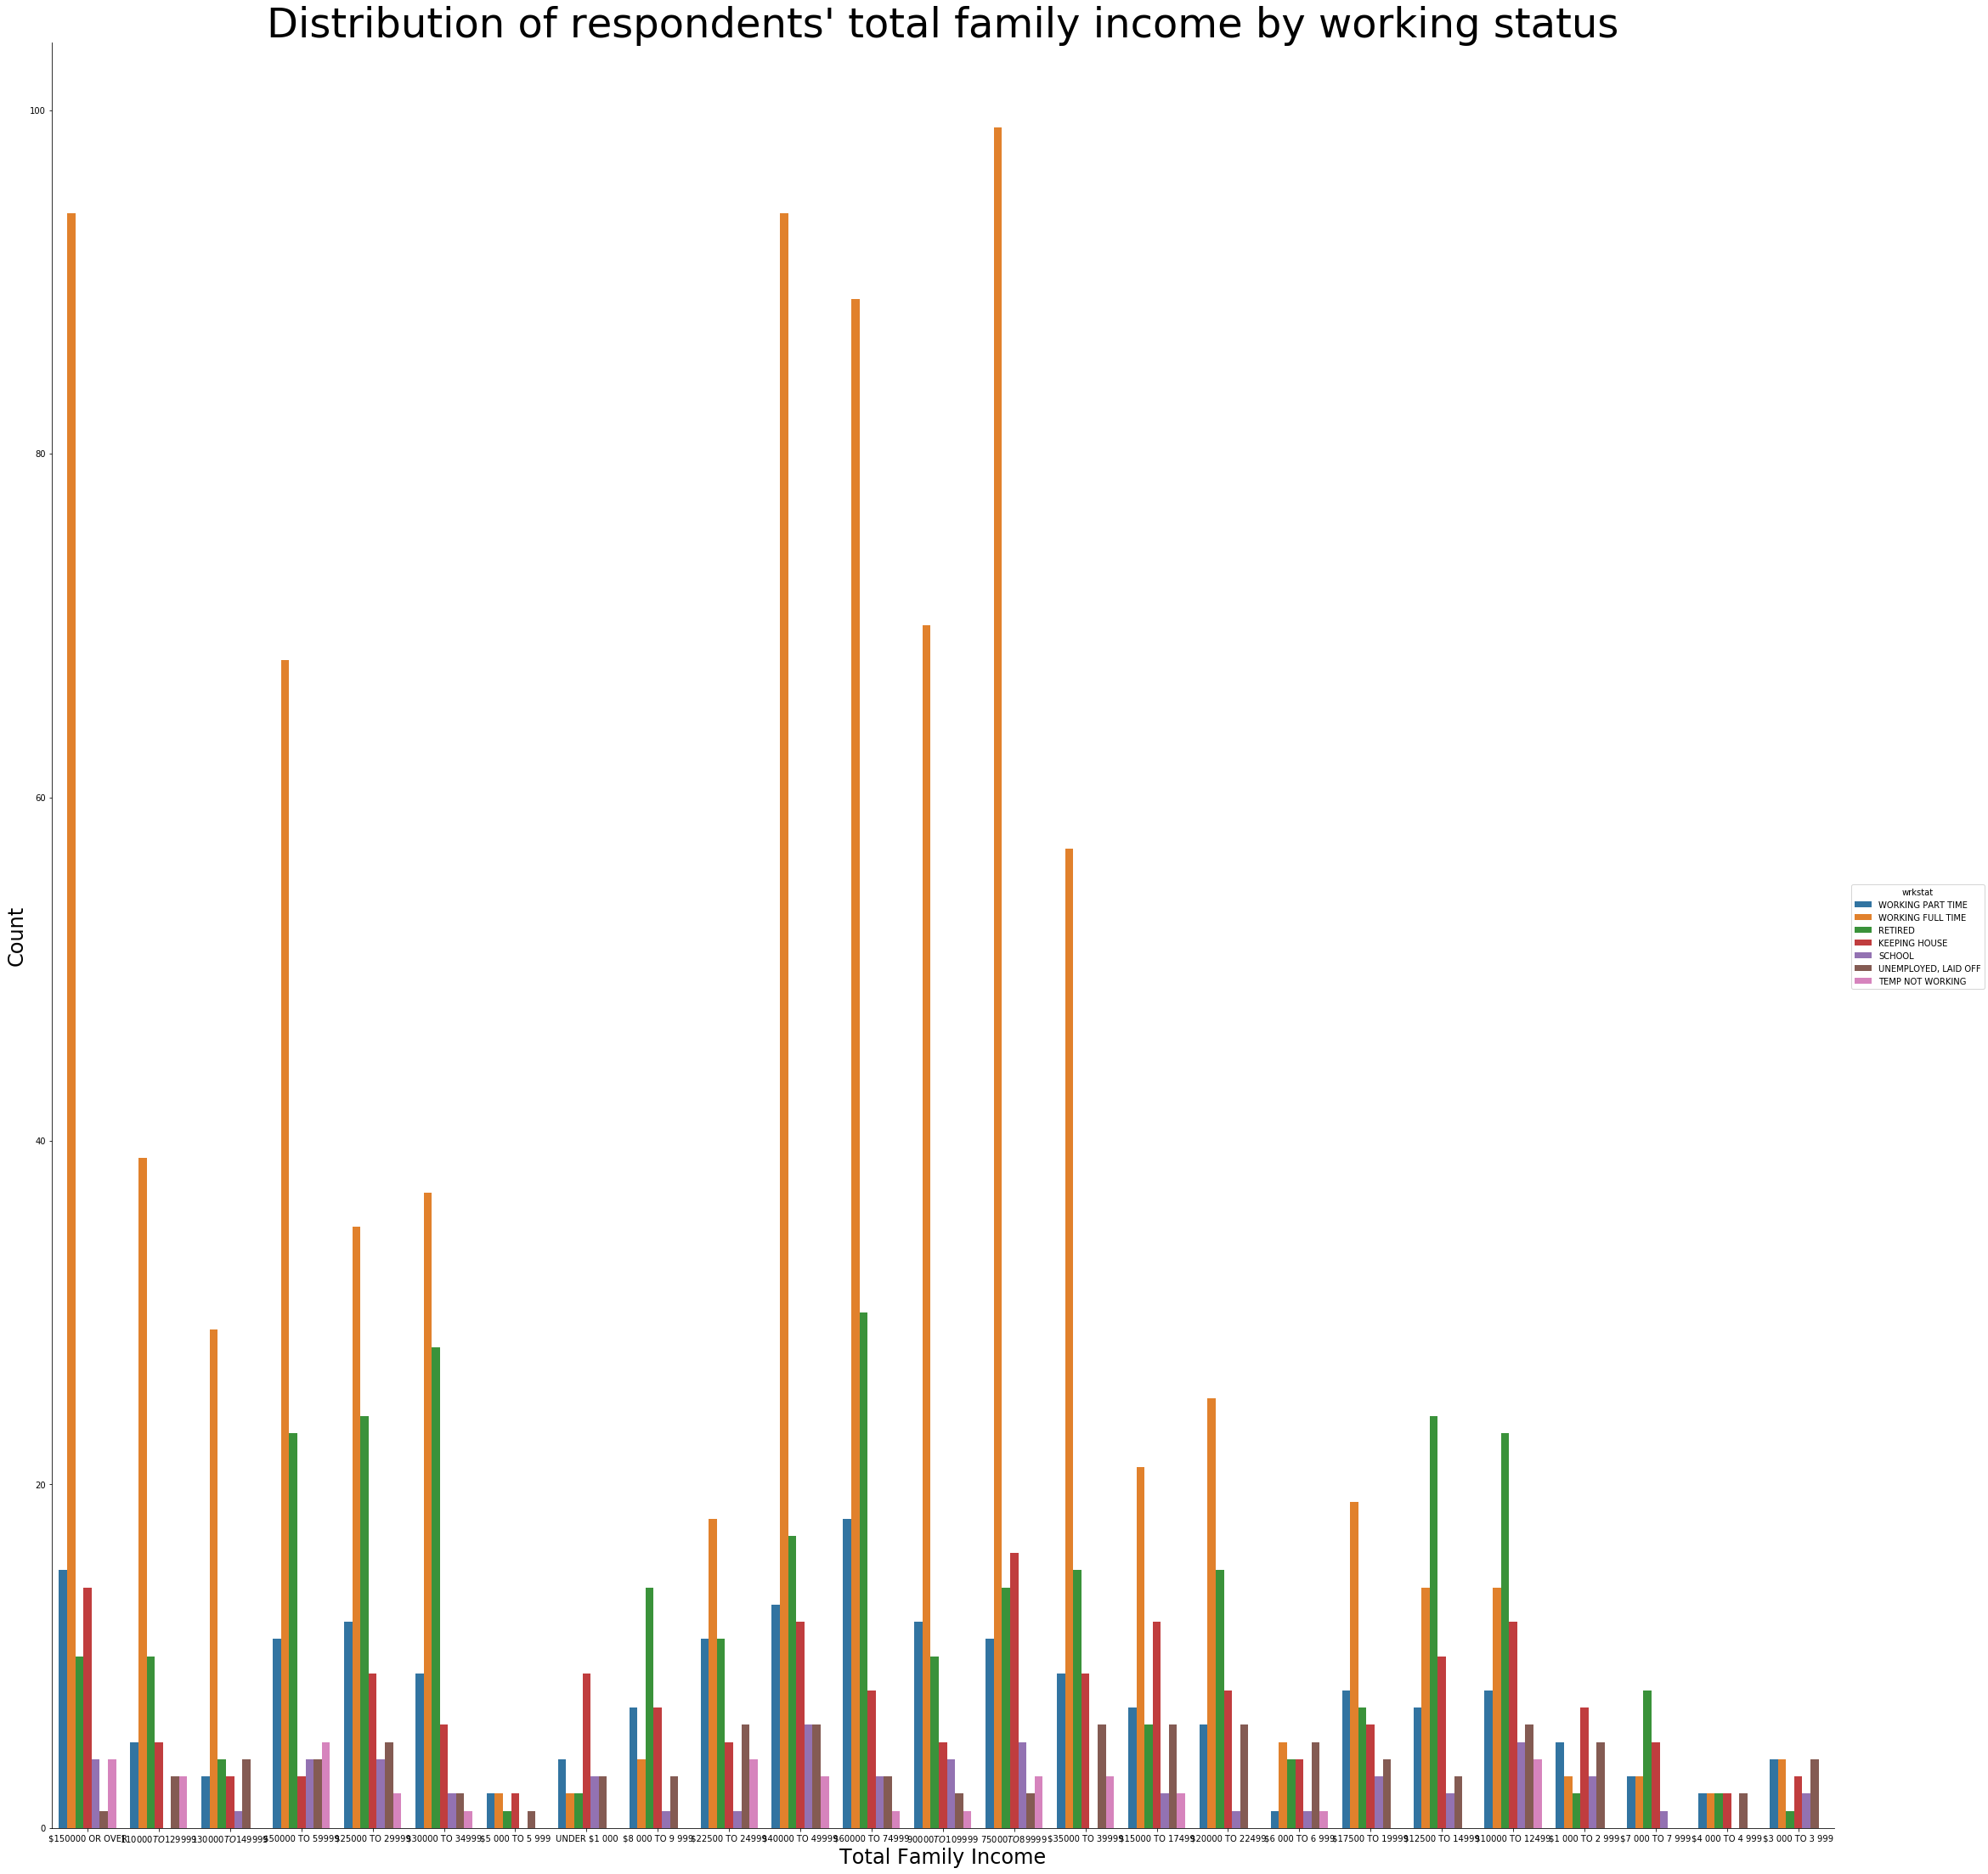

In [12]:
g = sns.factorplot('income06', kind='count', hue = 'wrkstat', data=gss_2012, size=30)
plt.title("Distribution of respondents' total family income by working status", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show() 

Through the graph above, we find in general, respondents who have full-time job or who retired are representing much more significantly than people with other working status in almost every income level, thus, we will first explore the income situation of people who work full time and who have retired.

We filter the original database and get the database only contain respondents who have full-time job.

In [14]:
filter = gss_2012.wrkstat == 'WORKING FULL TIME'
gss_wrkfulltime = gss_2012[filter]
gss_wrkfulltime.shape

(912, 221)

We can use boxplot to display the age distribution of people who work full time, and we find the median age is over 40, and there are also some outlier data who are over 80 but still work full time.

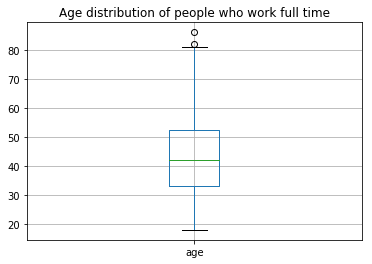

In [17]:
gss_wrkfulltime.boxplot('age')# the age distriburion of people who work full time
plt.title("Age distribution of people who work full time")
plt.show()

Then we plot the graph of the distribution of total family income again using the new database.

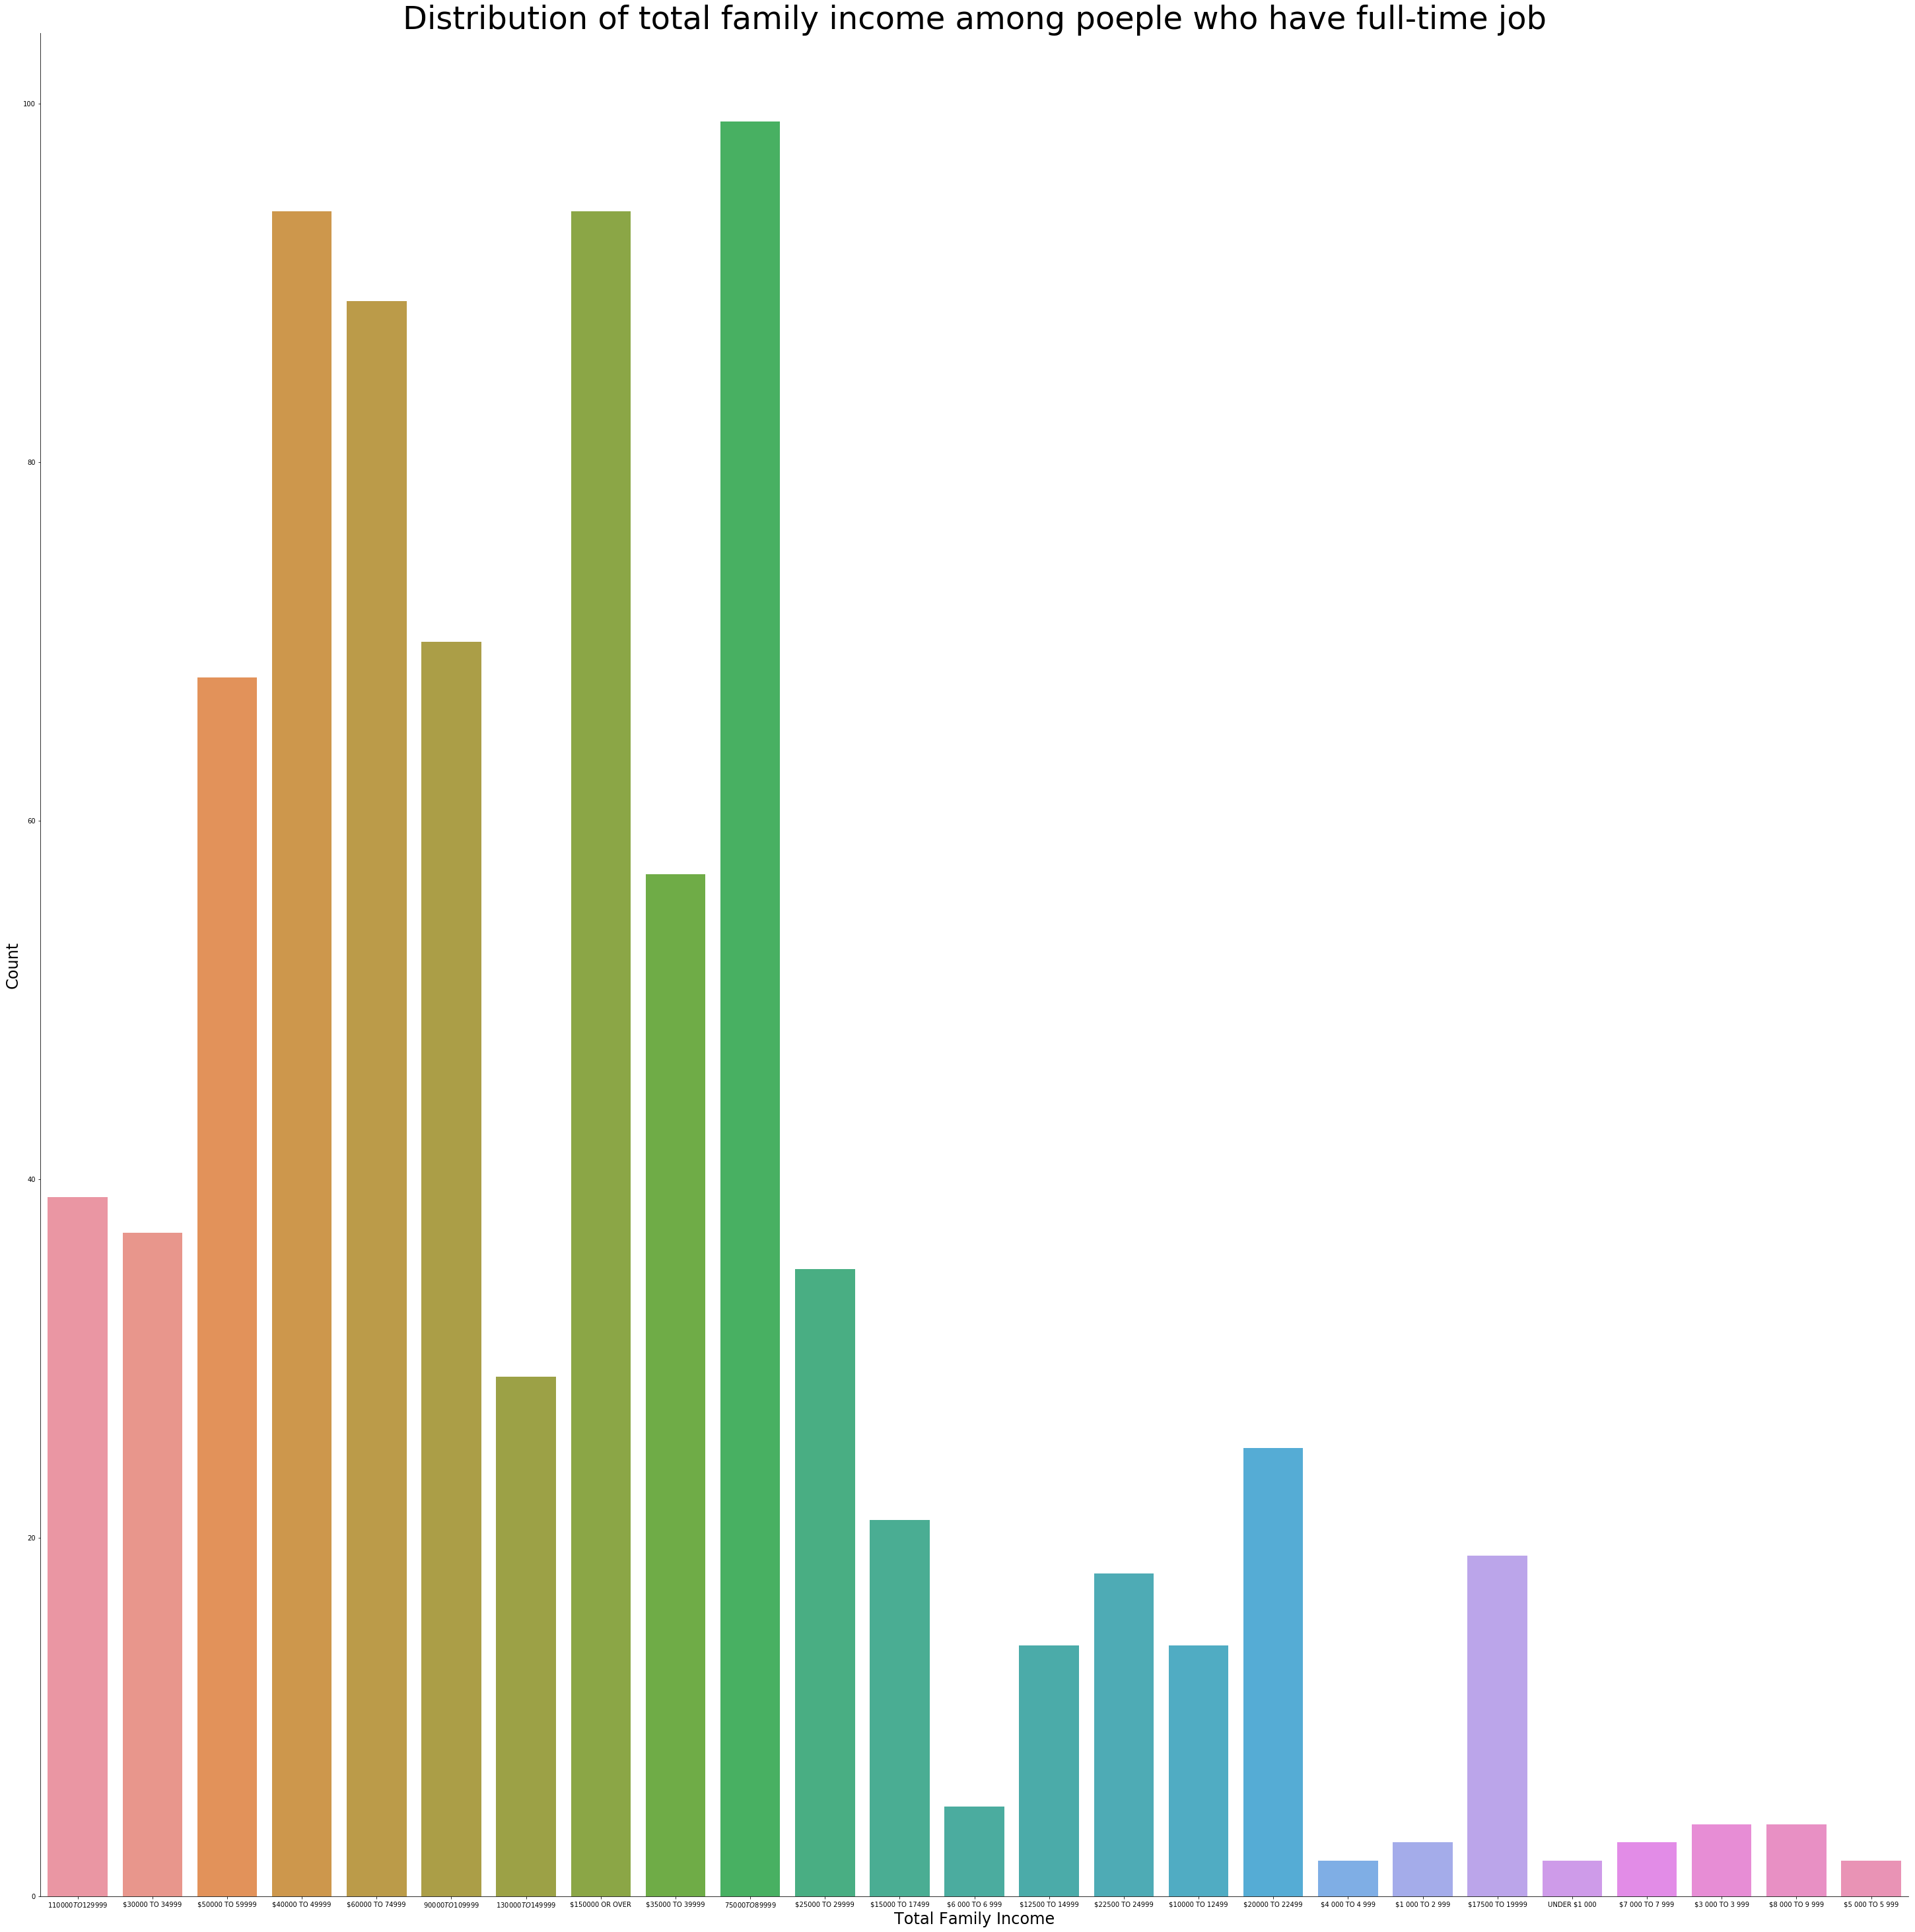

In [18]:
sns.factorplot('income06', kind='count', data=gss_wrkfulltime, size=40)# the overall distribution of total family income among people who have full-time job
plt.title("Distribution of total family income among poeple who have full-time job", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show() 

The following two graphs show the distribution of full-time workers total family income

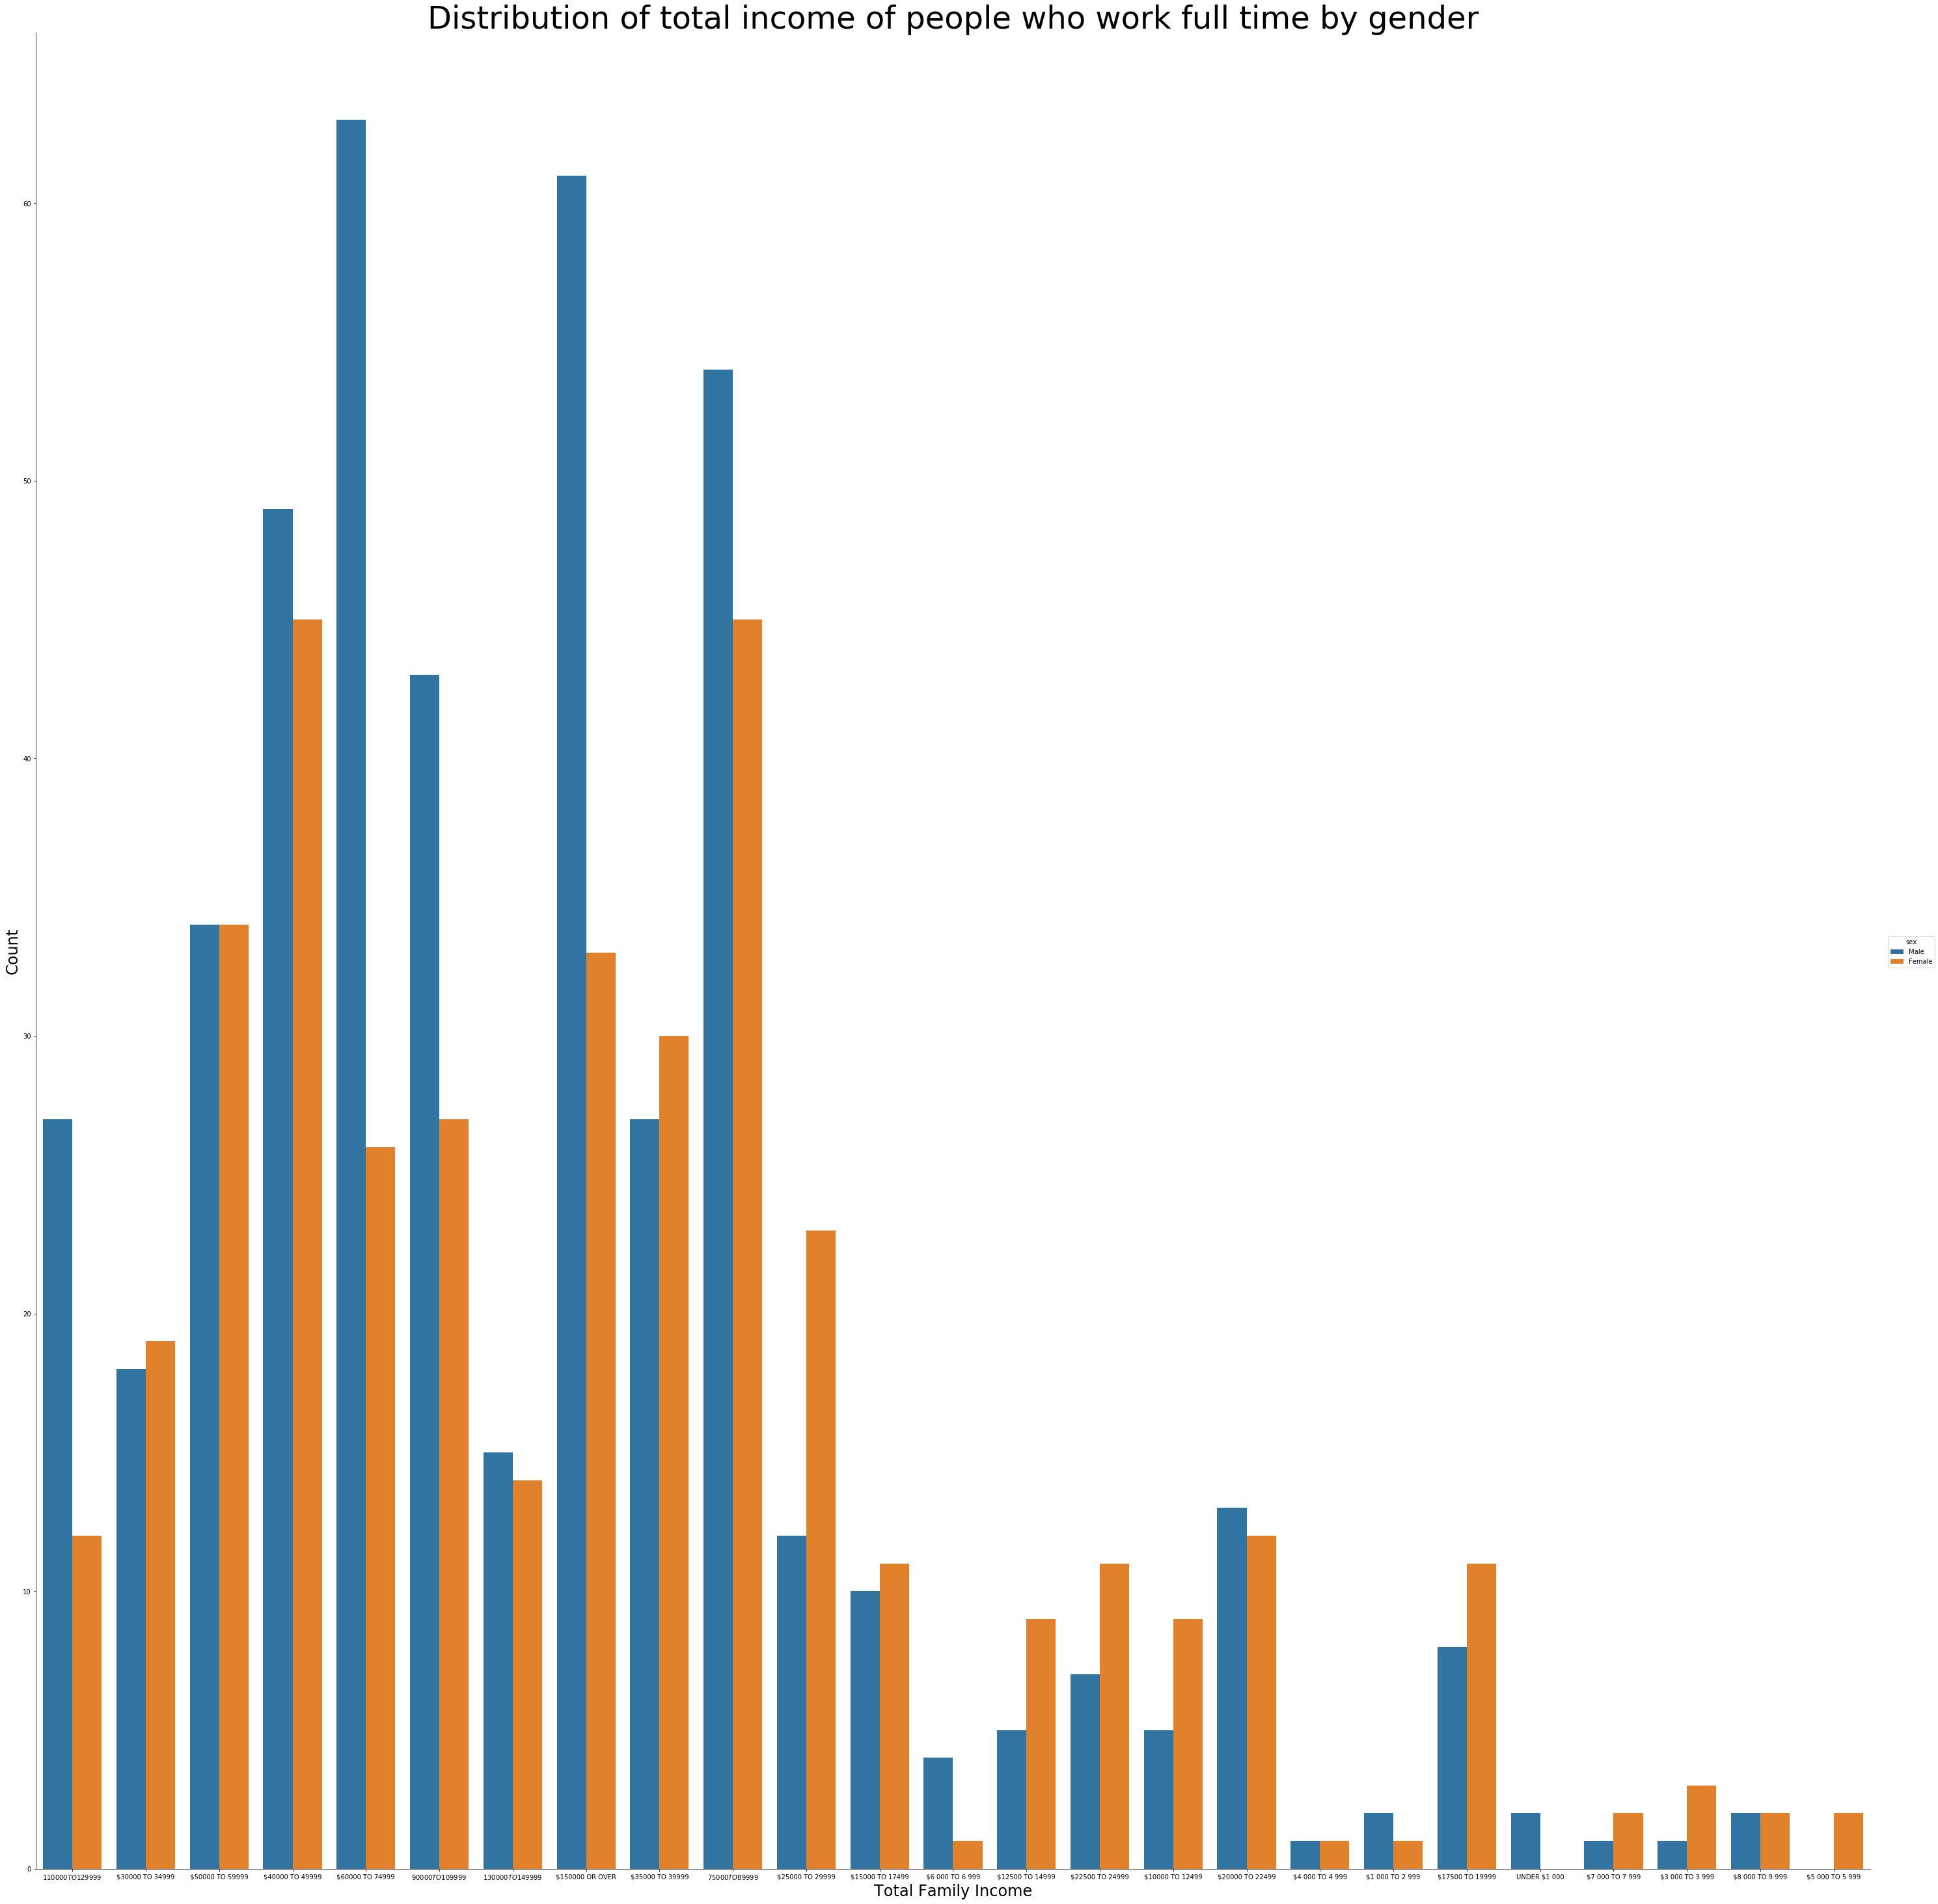

In [19]:
sns.factorplot('income06', kind='count', hue = 'sex', data=gss_wrkfulltime, size=40)
plt.title("Distribution of total income of people who work full time by gender", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()

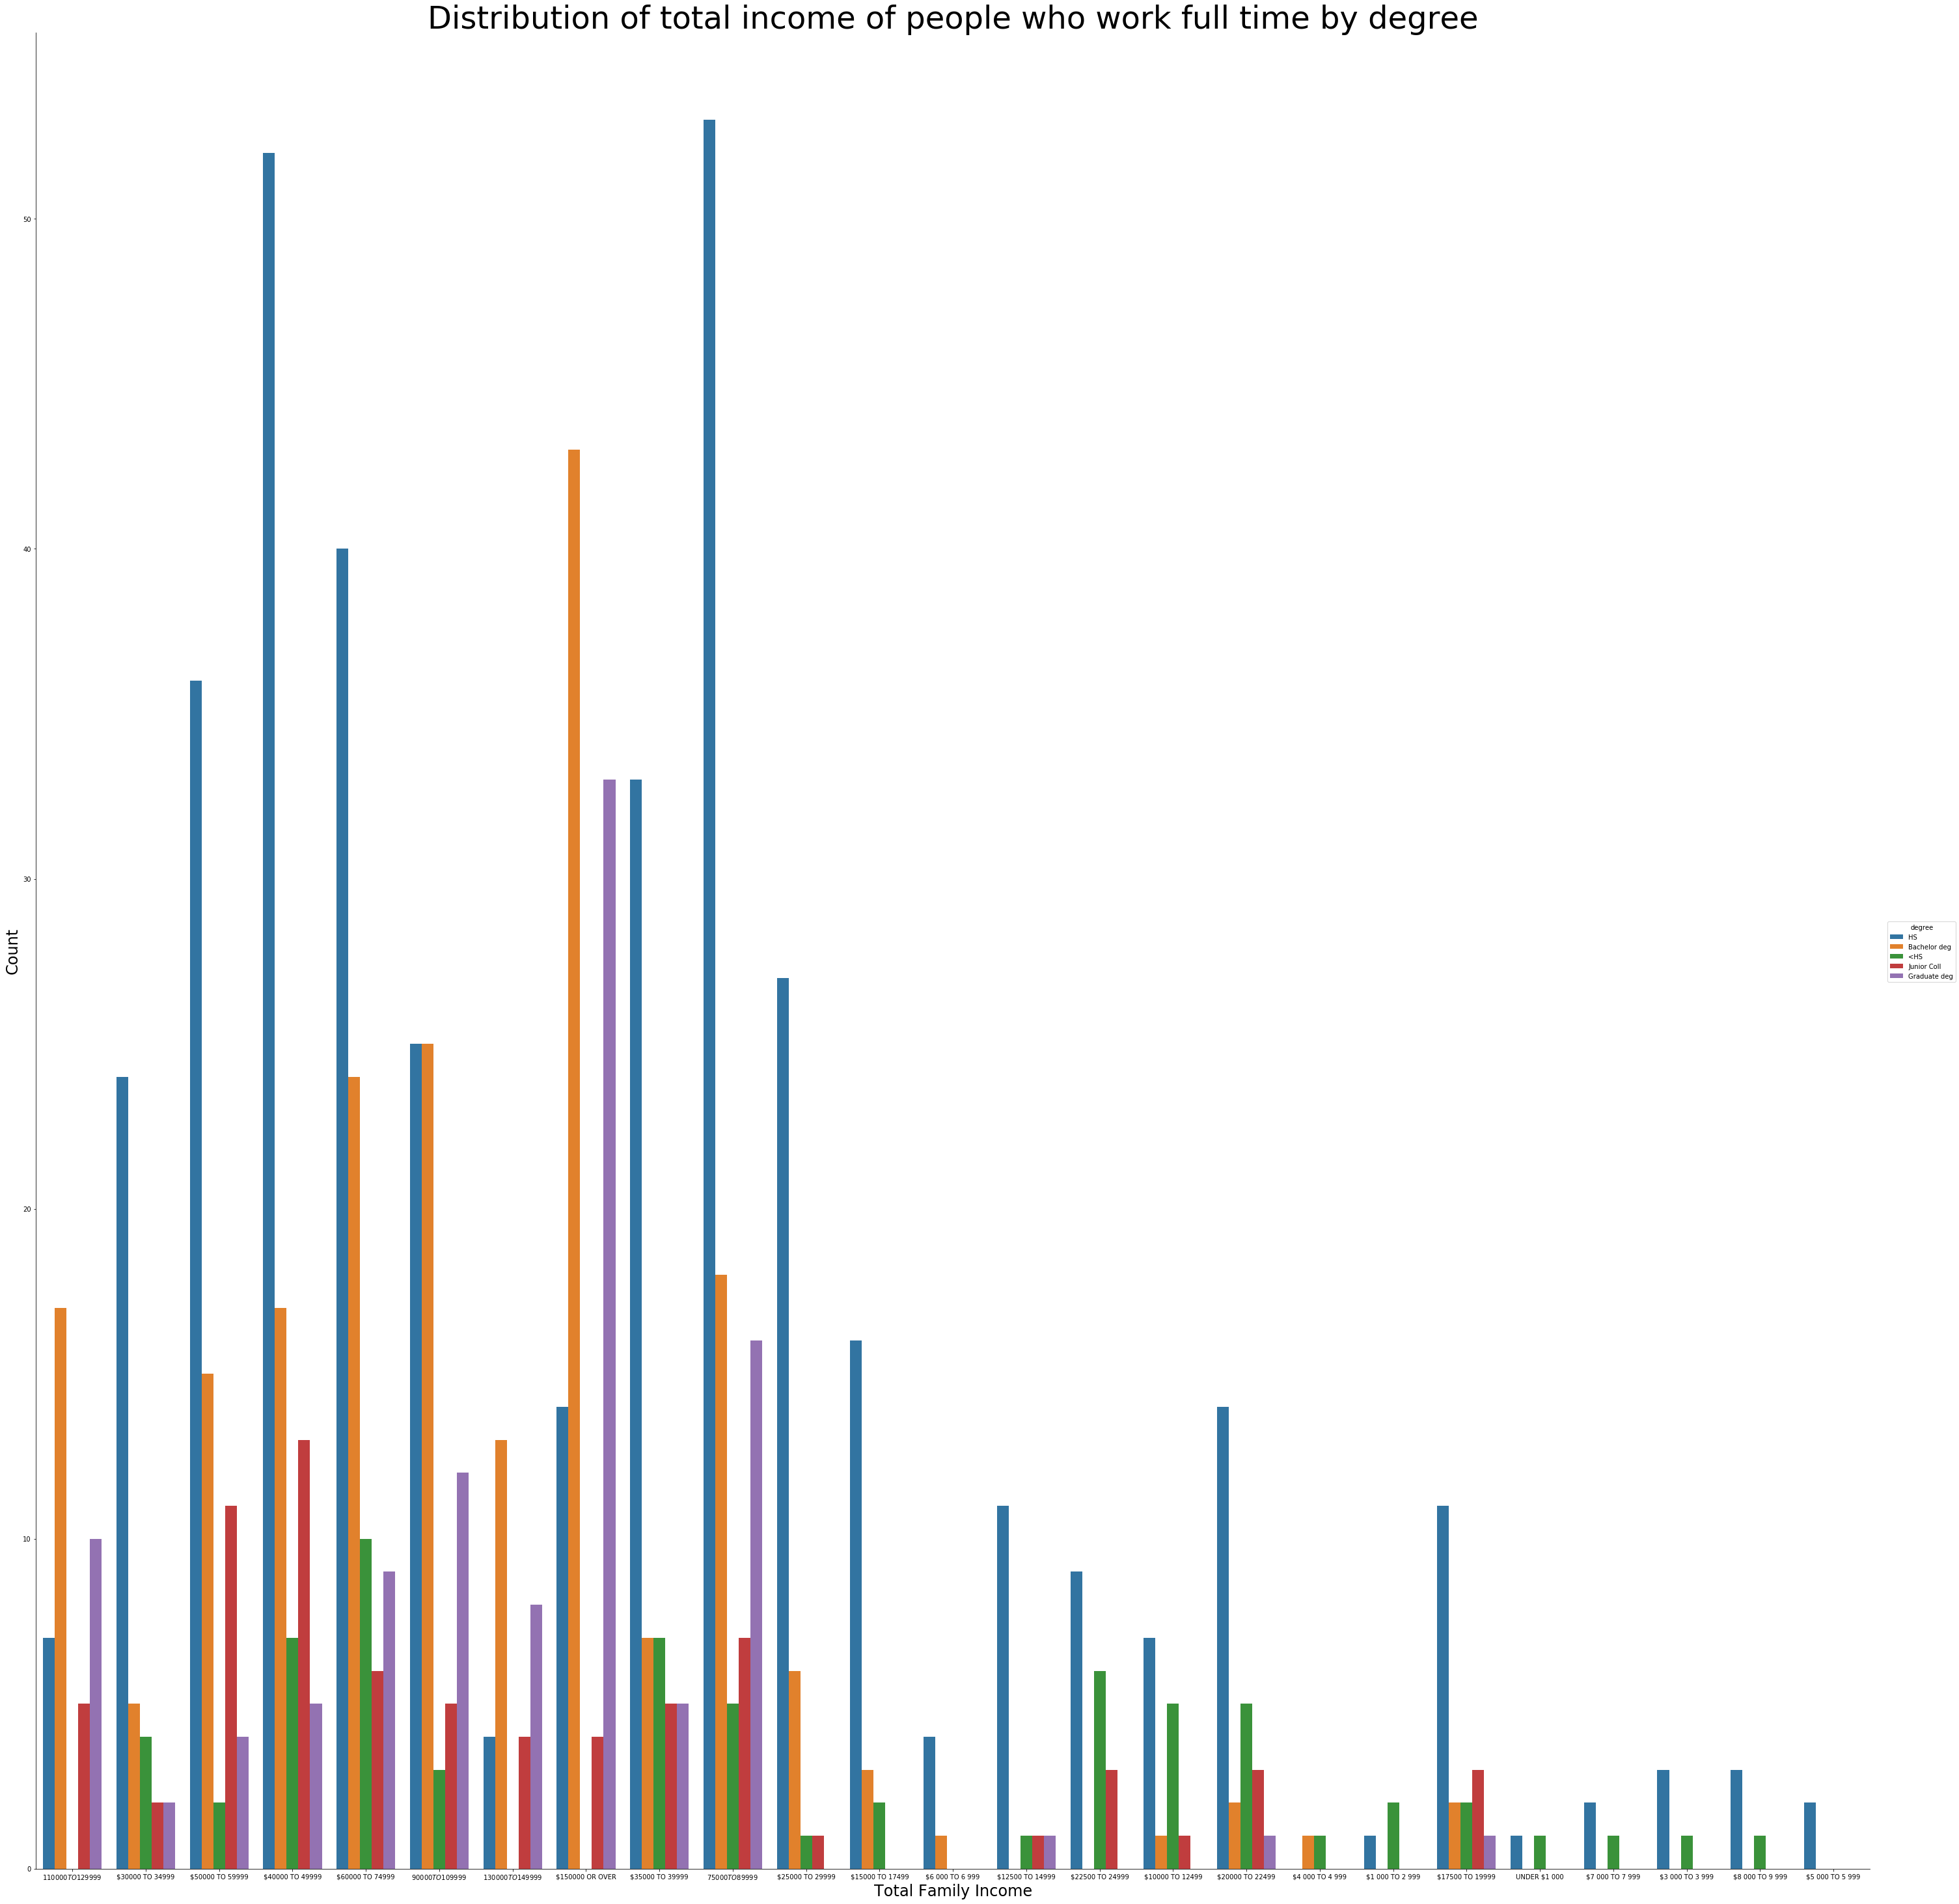

In [20]:
sns.factorplot('income06', kind='count', hue = 'degree', data=gss_wrkfulltime, size=40)
plt.title("Distribution of total income of people who work full time by degree", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()

Next step, we define the high-income people as respondents whose total family income are over $90000, and using this definition as a new filter condition, we can obtain the data only contains the high-income respondents who also work full time.

In [22]:
filter = (gss_wrkfulltime.income06 == "$150000 OR OVER") | (gss_wrkfulltime.income06 == "$130000 TO $149999")| (gss_wrkfulltime.income06 == "$110000 TO $129999")|(gss_wrkfulltime.income06 == "$90000 TO $109999")
gss_highincome = gss_wrkfulltime[filter]

The same as before, we make the count plot of the distribution of total family income using the "high-income" database.

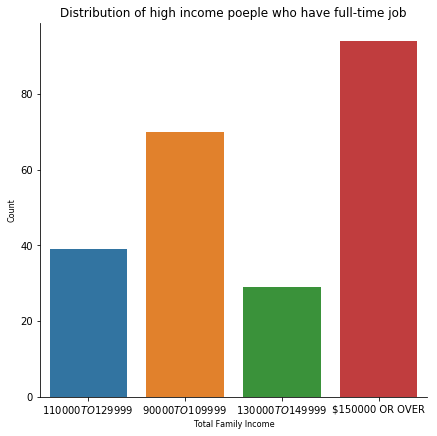

In [24]:
sns.factorplot('income06', kind='count', data=gss_highincome, size =6)
plt.title("Distribution of high income poeple who have full-time job", fontsize = 12)
plt.xlabel("Total Family Income", fontsize = 8)
plt.ylabel("Count", fontsize = 8)
plt.show() 

Then we take a look at the boxplot about age again.

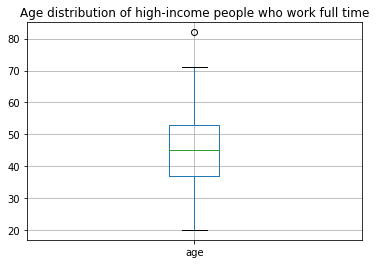

In [31]:
gss_highincome.boxplot('age')# the age distriburion of people who work full time and have high total income
plt.title("Age distribution of high-income people who work full time")
plt.show()

/Users/winston/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


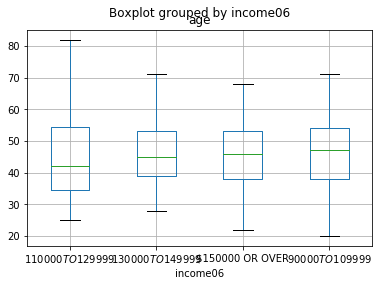

In [27]:
gss_highincome.boxplot('age','income06')# the age distriburion by people's income
plt.show()

Next we can compare those high-income people by their race to help us figure out whether there exist race discrimination among high-income group.

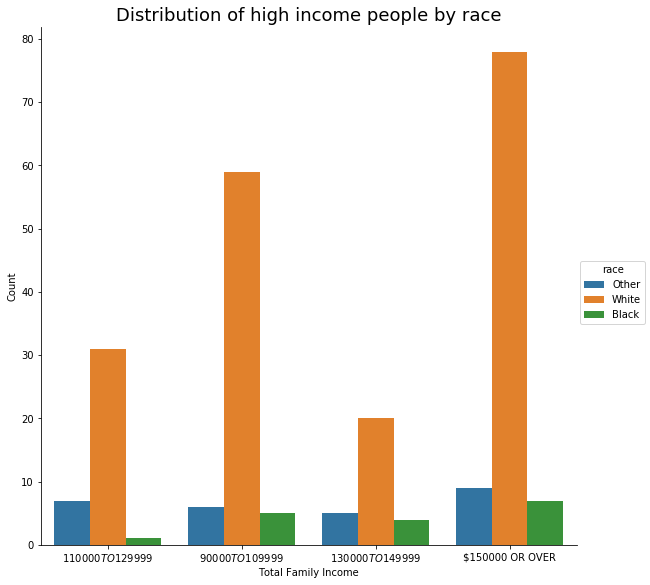

In [28]:
sns.factorplot('income06', kind='count', hue = 'race', data=gss_highincome, size = 8)
plt.title("Distribution of high income people by race", fontsize = 18)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show() 

Also we can compare those high-income people by their gender to help us figure out whether there exist gender discrimination among high-income group.

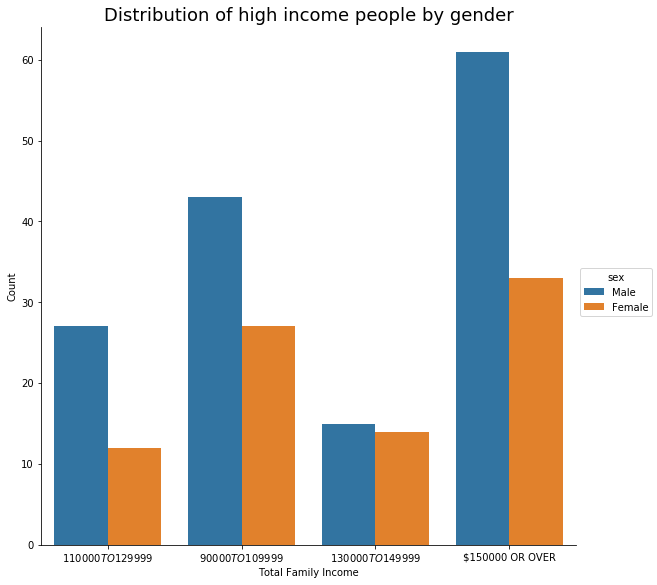

In [29]:
sns.factorplot('income06', kind='count', hue = 'sex', data=gss_highincome, size = 8)
plt.title("Distribution of high income people by gender", fontsize = 18)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

The follwing two graphs show the distribution of high income people by degree and by region

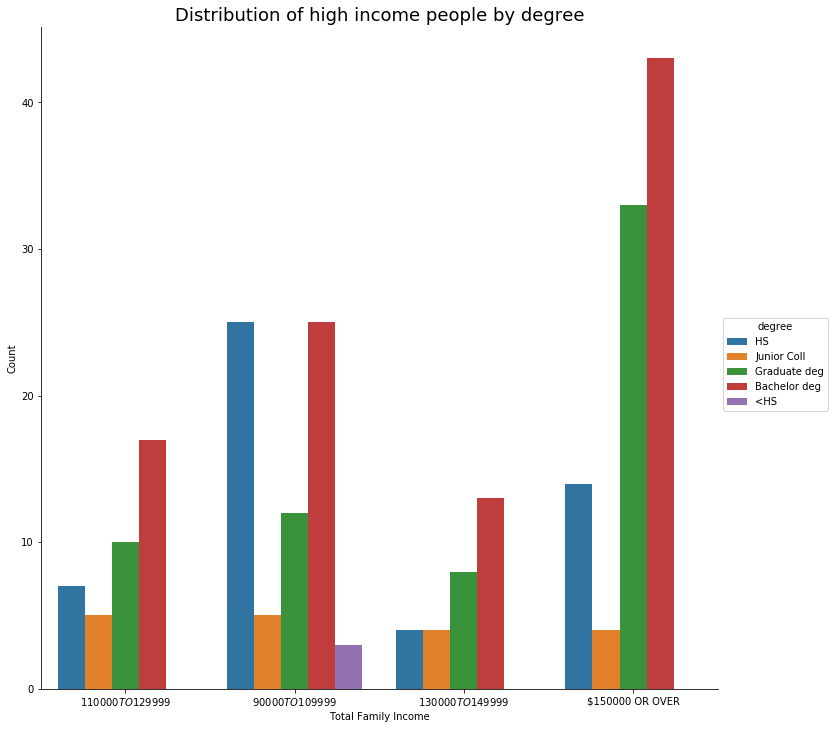

In [30]:
sns.factorplot('income06', kind='count', hue = 'degree', data=gss_highincome, size = 10)
plt.title("Distribution of high income people by degree", fontsize = 18)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

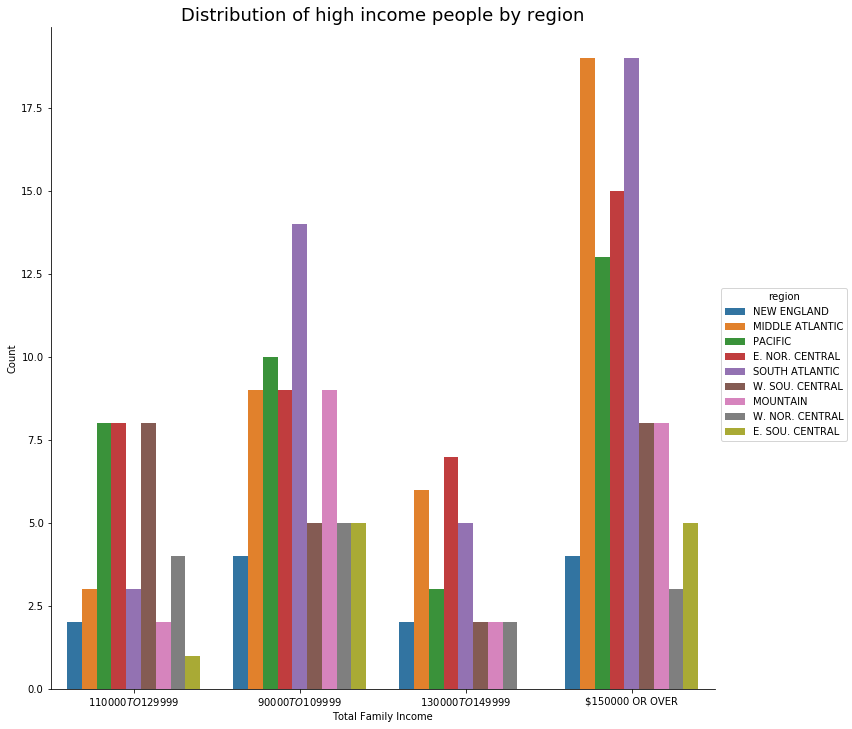

In [31]:
sns.factorplot('income06', kind='count', hue = 'region', data=gss_highincome, size = 10)
plt.title("Distribution of high income people by region", fontsize = 18)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

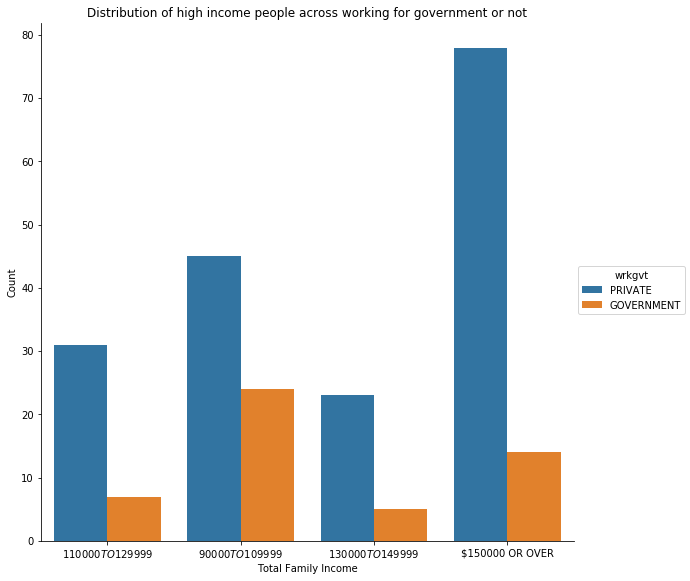

In [32]:
sns.factorplot('income06', kind='count', hue = 'wrkgvt', data=gss_highincome, size =8)
plt.title("Distribution of high income people across working for government or not", fontsize = 12)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

Then we can use strip plot and box plot to display the overall stituation about the number of childeren those high-income respondents have.

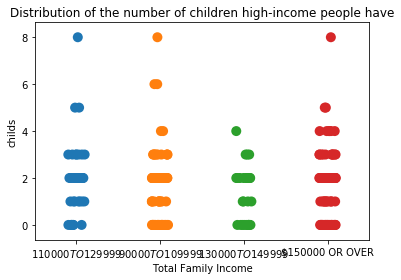

In [35]:
sns.stripplot(y = "childs", x = "income06", data = gss_highincome, jitter = True, size = 10)
plt.title("Distribution of the number of children high-income people have")
plt.xlabel("Total Family Income", fontsize = 10)
plt.show()

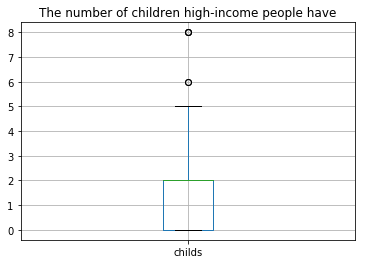

In [67]:
gss_highincome.boxplot('childs')
plt.title("The number of children high-income people have")
plt.show()

Then we plot the swarm plots and multi-panel box plot to display the distribution of high-income people across multiple variables (e.g. age and race).

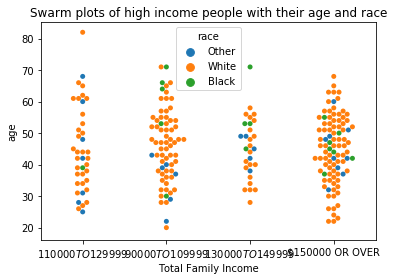

In [36]:
sns.swarmplot(x="income06", y="age", hue="race", data=gss_highincome)
plt.title("Swarm plots of high income people with their age and race")
plt.xlabel("Total Family Income", fontsize = 10)
plt.show()

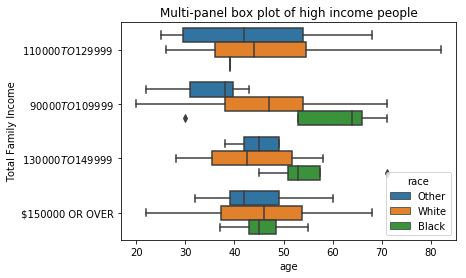

In [37]:
sns.boxplot(x="age", y="income06", hue="race", data=gss_highincome)
plt.title("Multi-panel box plot of high income people")
plt.ylabel("Total Family Income", fontsize = 10)
plt.show()

We can also using graphs to investigate the relationship between people's income and their answers to some behavioral and attitudual questions existed in the dataset.

The first graph shows the comparison of people's extent of happiness across people's income and the children they have.

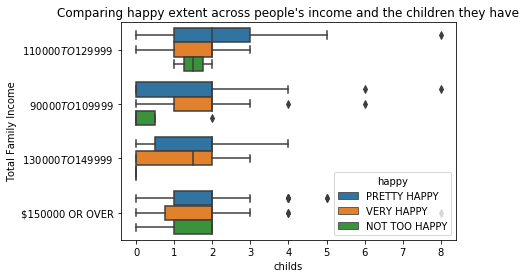

In [38]:
sns.boxplot(x="childs", y="income06", hue="happy", data=gss_highincome)
plt.title("Comparing happy extent across people's income and the children they have")
plt.ylabel("Total Family Income", fontsize = 10)
plt.show()

Another multi-panel cross-demographic visualization, compare the difference of high-income people across people's gender and race using box plot and violin plot and swarm plot.

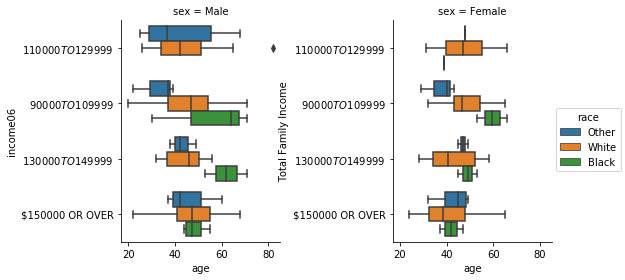

In [40]:
sns.factorplot(x="age", y="income06", hue="race", col="sex", data=gss_highincome, kind="box")
plt.show()

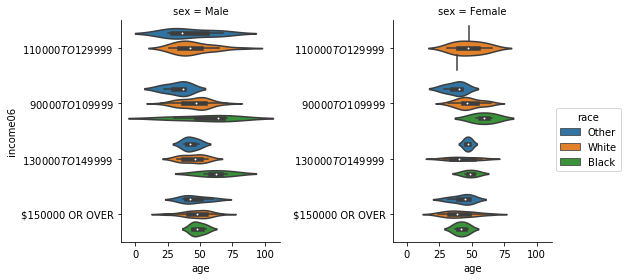

In [85]:
sns.factorplot(x="age", y="income06", hue="race", col="sex", data=gss_highincome, kind="violin")
plt.show()

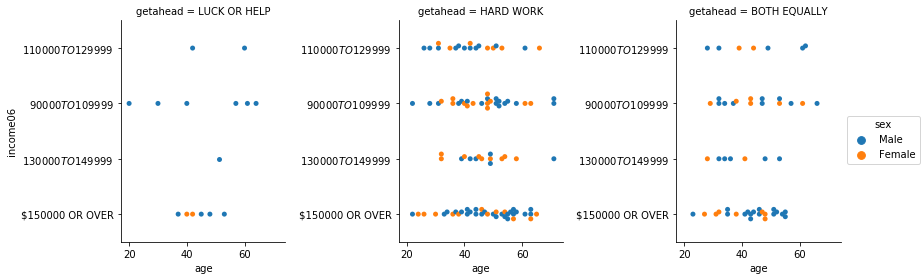

In [87]:
sns.factorplot(x="age", y="income06", hue="sex", col="getahead", data=gss_highincome, kind="swarm")
plt.show()

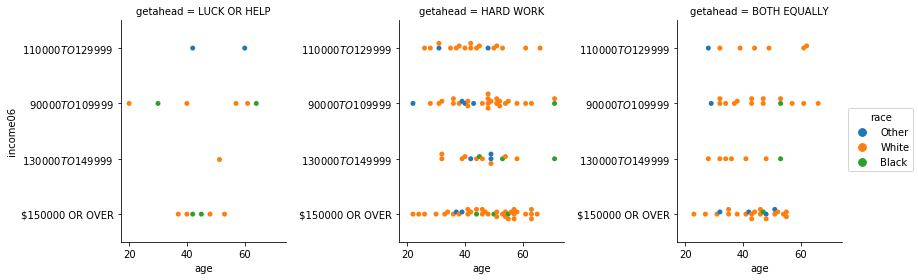

In [90]:
sns.factorplot(x="age", y="income06", hue="race", col="getahead", data=gss_highincome, kind="swarm")
plt.show()

After completing the exploration about the high-income respondents database, we reset the filter condition and get the dataset only including people with medium income. The medium-income people represents people whose total family income is over 40000 dollars.

In [42]:
filter = (gss_wrkfulltime.income06 == "$75000 TO $89999") | (gss_wrkfulltime.income06 == "$60000 TO 74999")|(gss_wrkfulltime.income06 == "$50000 TO 59999")|(gss_wrkfulltime.income06 == "$40000 TO 49999")
gss_mediumincome = gss_wrkfulltime[filter]

When we get the database of medium-income respondents, we repeat some of the code before, but just change the database from high-income database to this medium-income database.

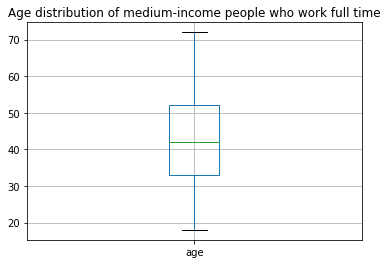

In [43]:
gss_mediumincome.boxplot('age')# the age distriburion of people who work full time and have medium total income
plt.title("Age distribution of medium-income people who work full time")
plt.show()

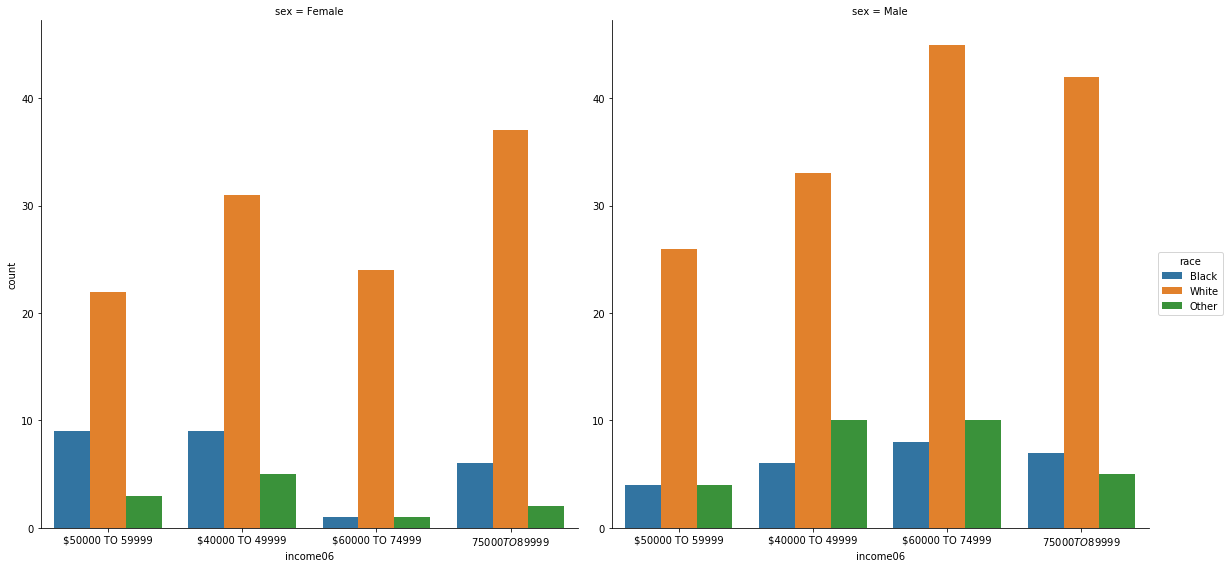

In [44]:
sns.factorplot('income06', kind='count', hue = 'race', col = 'sex', data=gss_mediumincome, size = 8)
plt.show() 

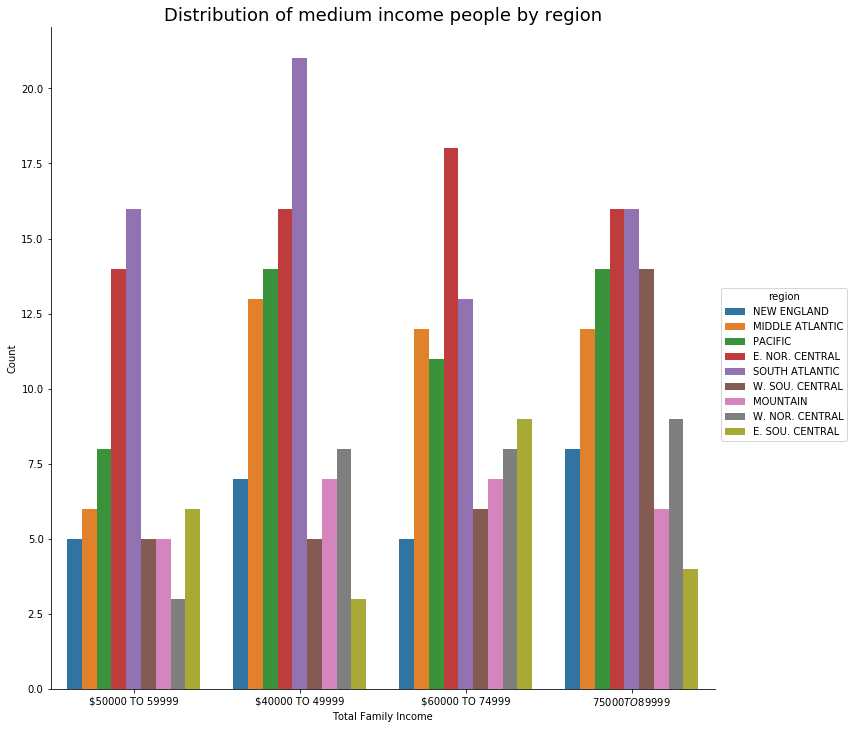

In [45]:
sns.factorplot('income06', kind='count', hue = 'region', data=gss_mediumincome, size = 10)
plt.title("Distribution of medium income people by region", fontsize = 18)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

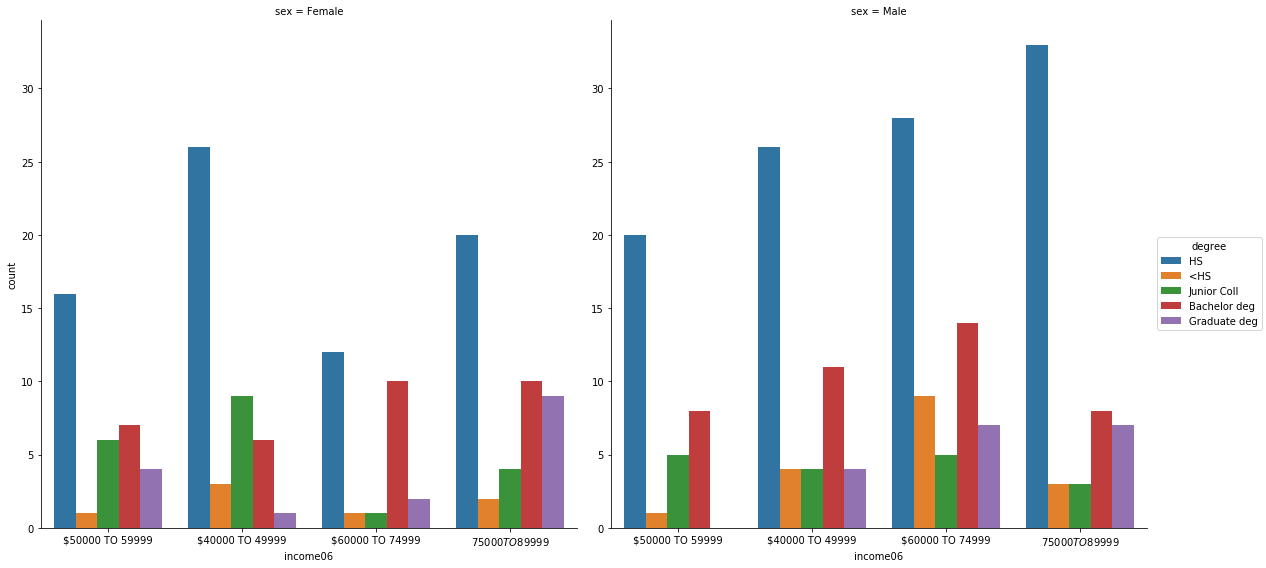

In [146]:
sns.factorplot('income06', kind='count', hue = 'degree', col = 'sex', data=gss_mediumincome, size = 8)
plt.show()

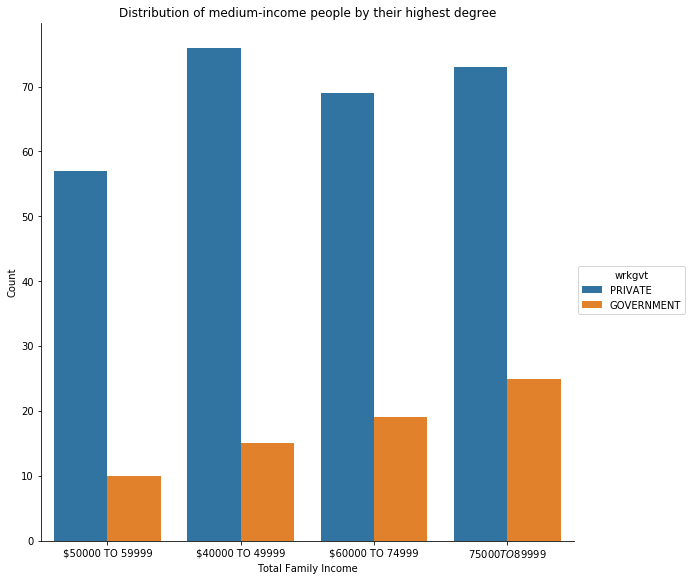

In [46]:
sns.factorplot('income06', kind='count', hue = 'wrkgvt', data=gss_mediumincome, size =8)
plt.title("Distribution of medium-income people by their highest degree")
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

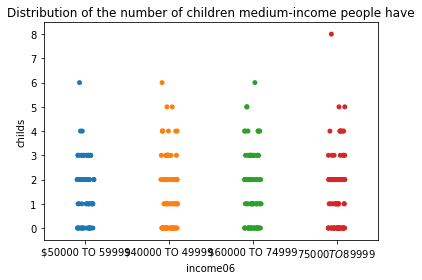

In [106]:
sns.stripplot(y = "childs", x = "income06", data = gss_mediumincome, jitter = True)
plt.title("Distribution of the number of children medium-income people have")
plt.show()

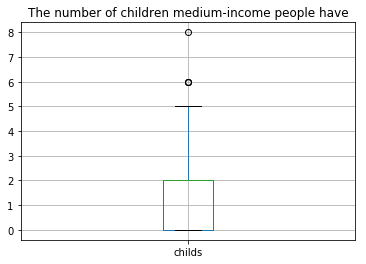

In [104]:
gss_mediumincome.boxplot('childs')
plt.title("The number of children medium-income people have")
plt.show()

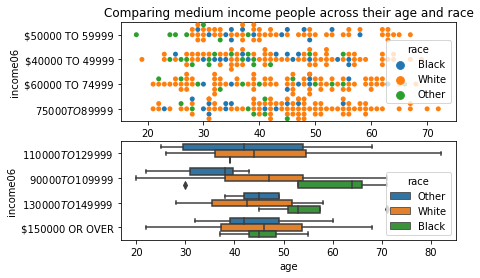

In [110]:
plt.subplot(2,1,1)
sns.swarmplot(x="age", y="income06", hue="race", data=gss_mediumincome)
plt.title("Comparing medium income people across their age and race")
plt.subplot(2,1,2)
sns.boxplot(x="age", y="income06", hue="race", data=gss_highincome)
plt.show()

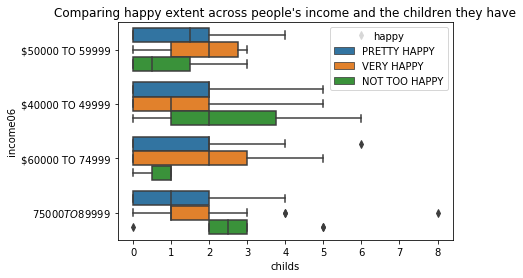

In [111]:
sns.boxplot(x="childs", y="income06", hue="happy", data=gss_mediumincome)
plt.title("Comparing happy extent across people's income and the children they have")
plt.show()

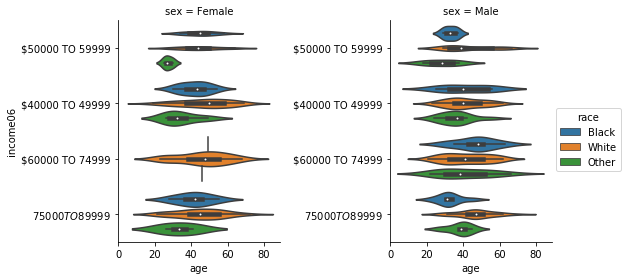

In [114]:
sns.factorplot(x="age", y="income06", hue="race", col="sex", data=gss_mediumincome, kind="violin")
plt.show()

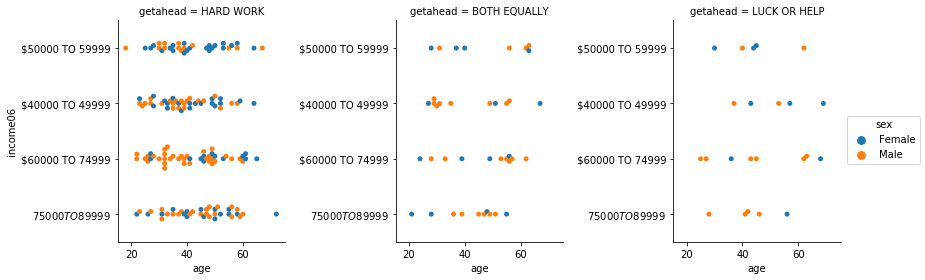

In [115]:
sns.factorplot(x="age", y="income06", hue="sex", col="getahead", data=gss_mediumincome, kind="swarm")
plt.show()

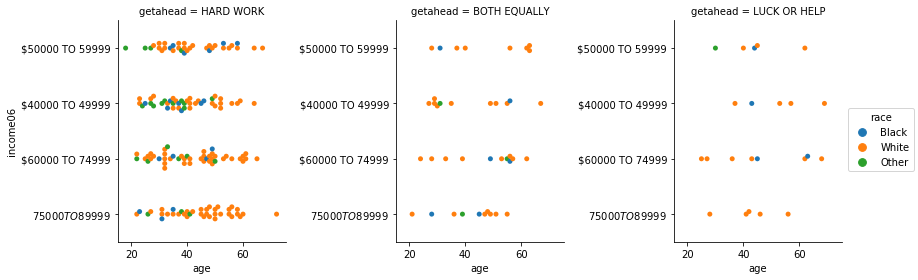

In [116]:
sns.factorplot(x="age", y="income06", hue="race", col="getahead", data=gss_mediumincome, kind="swarm")
plt.show()

The following part is about people who retired, the same as before, we get a totally new database only including retired people, and we can still do the same coding to produce the graphs we want.

In [48]:
filter = gss_2012.wrkstat == 'RETIRED'
gss_retired = gss_2012[filter]
gss_retired.shape

(357, 221)

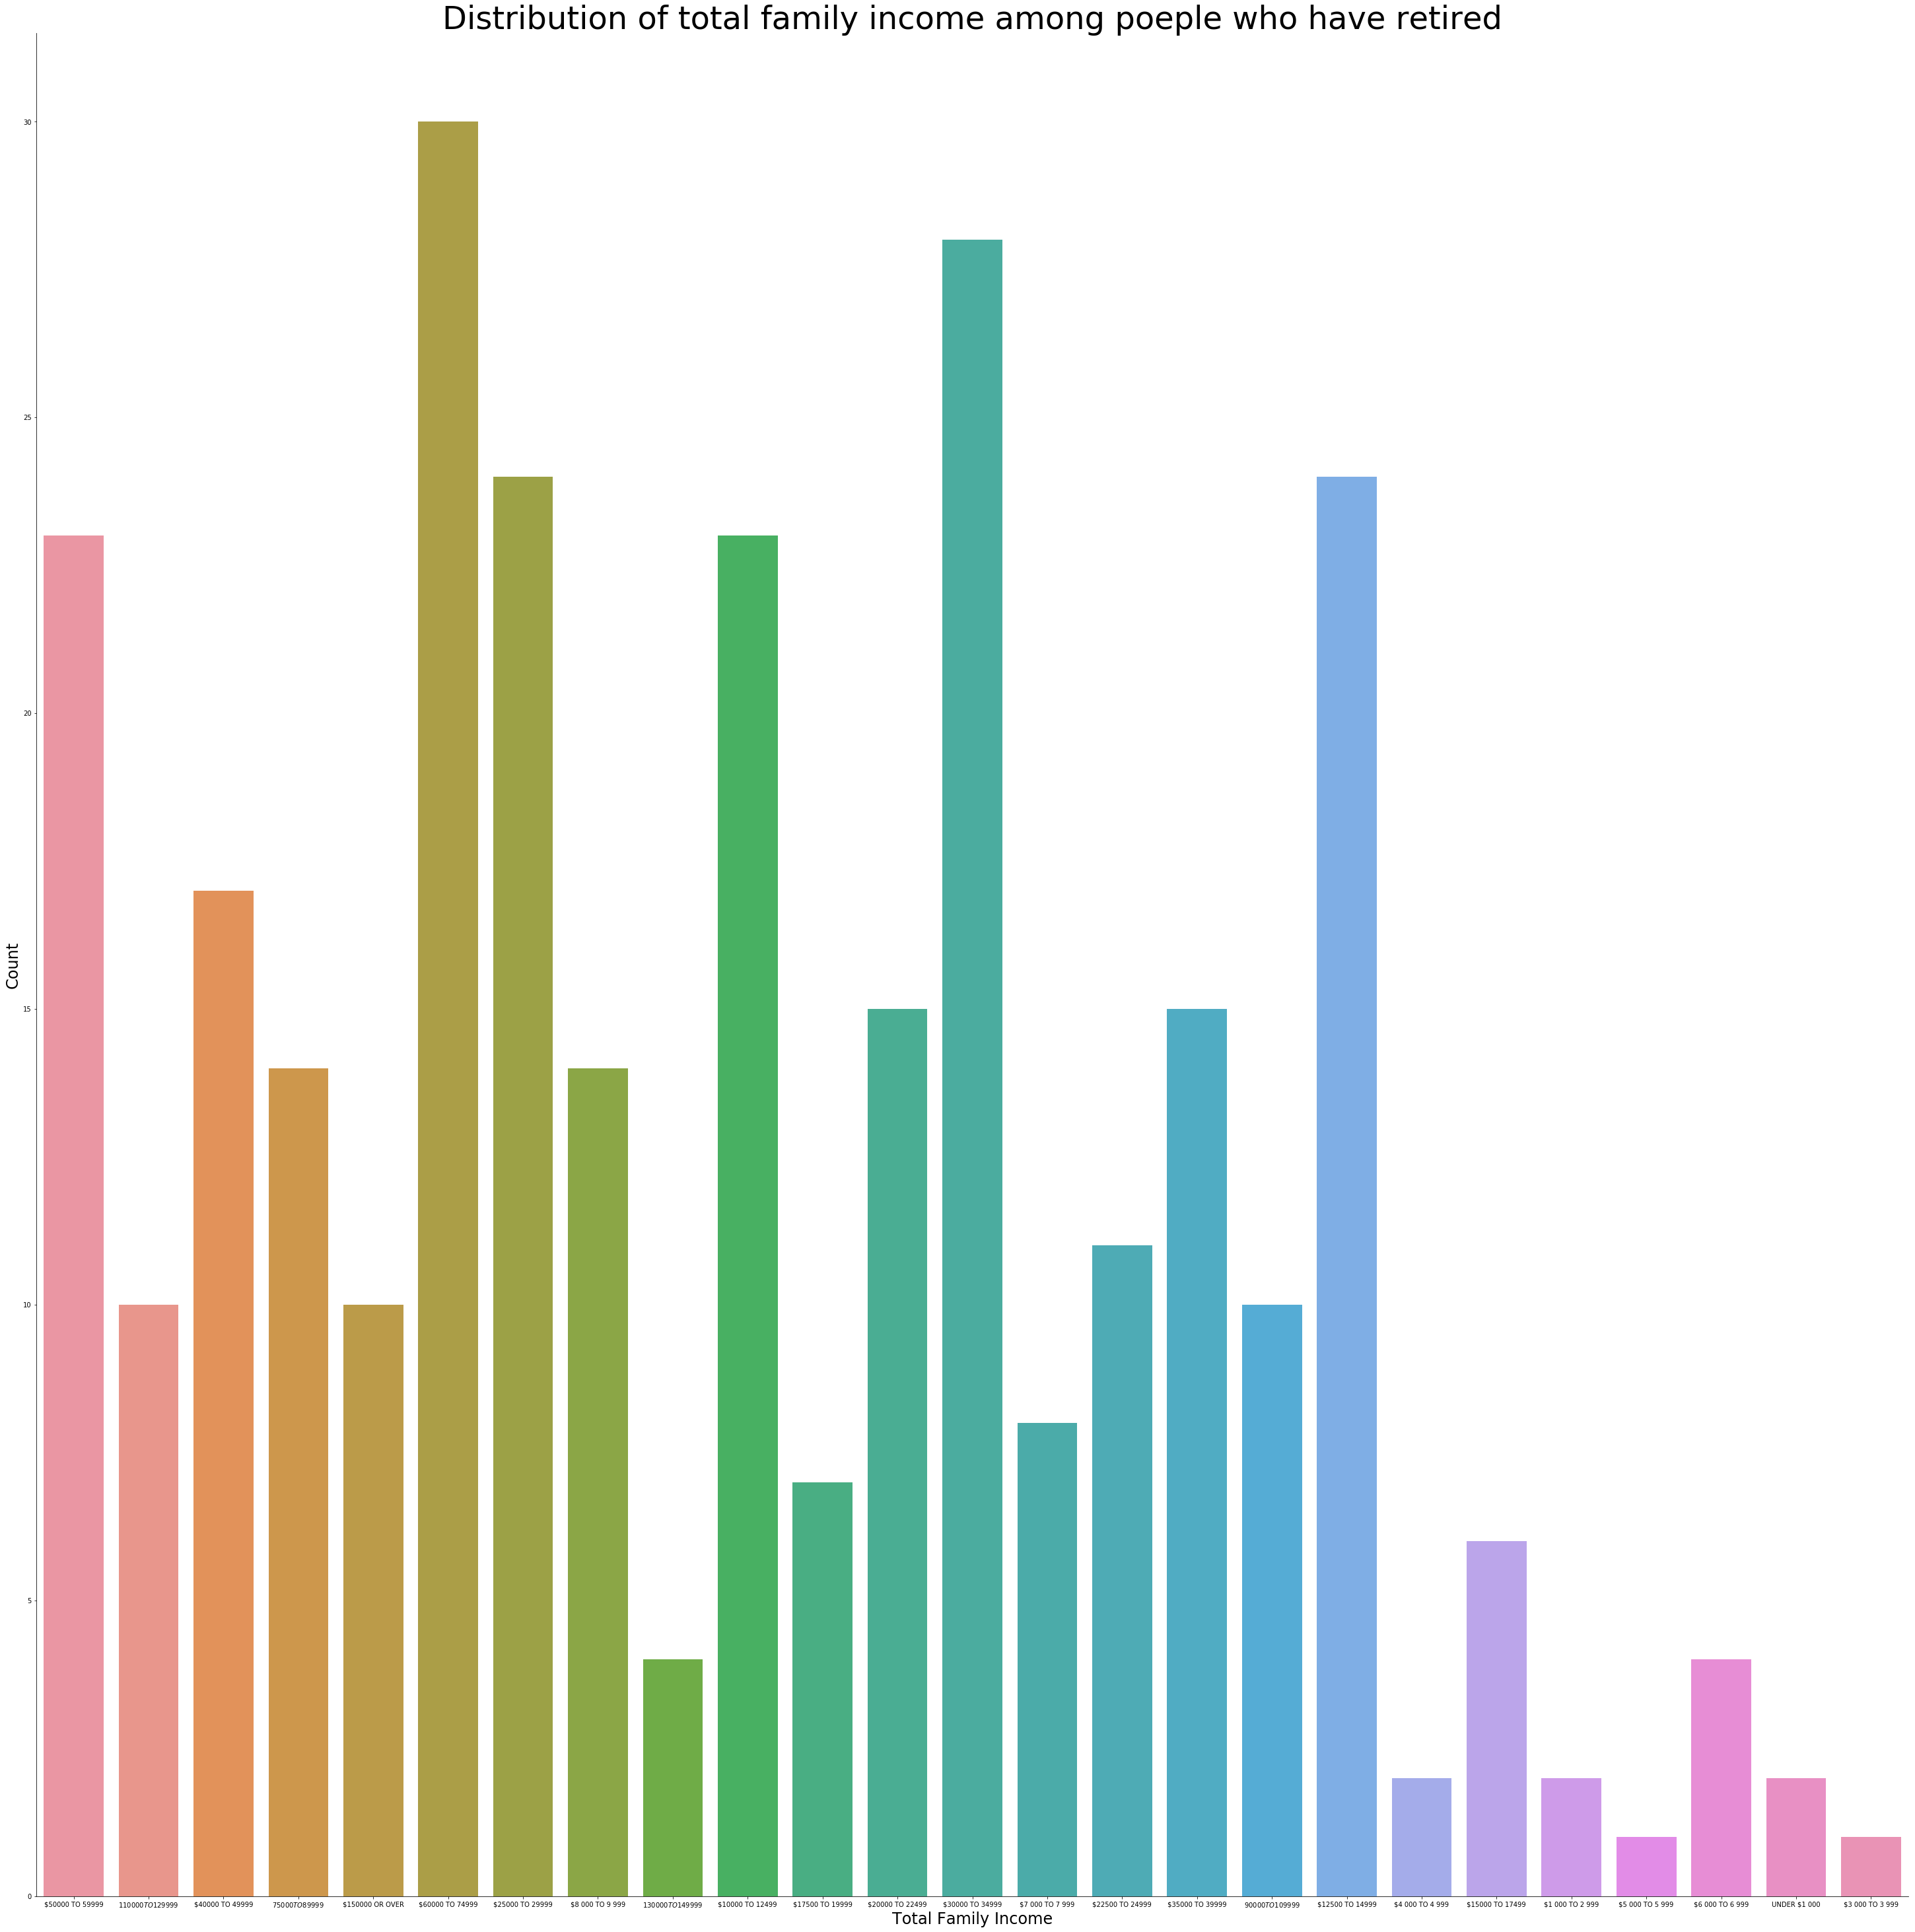

In [49]:
sns.factorplot('income06', kind='count', data=gss_retired, size=40)# the overall distribution of total family income among people who have retired 
plt.title("Distribution of total family income among poeple who have retired", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show() 

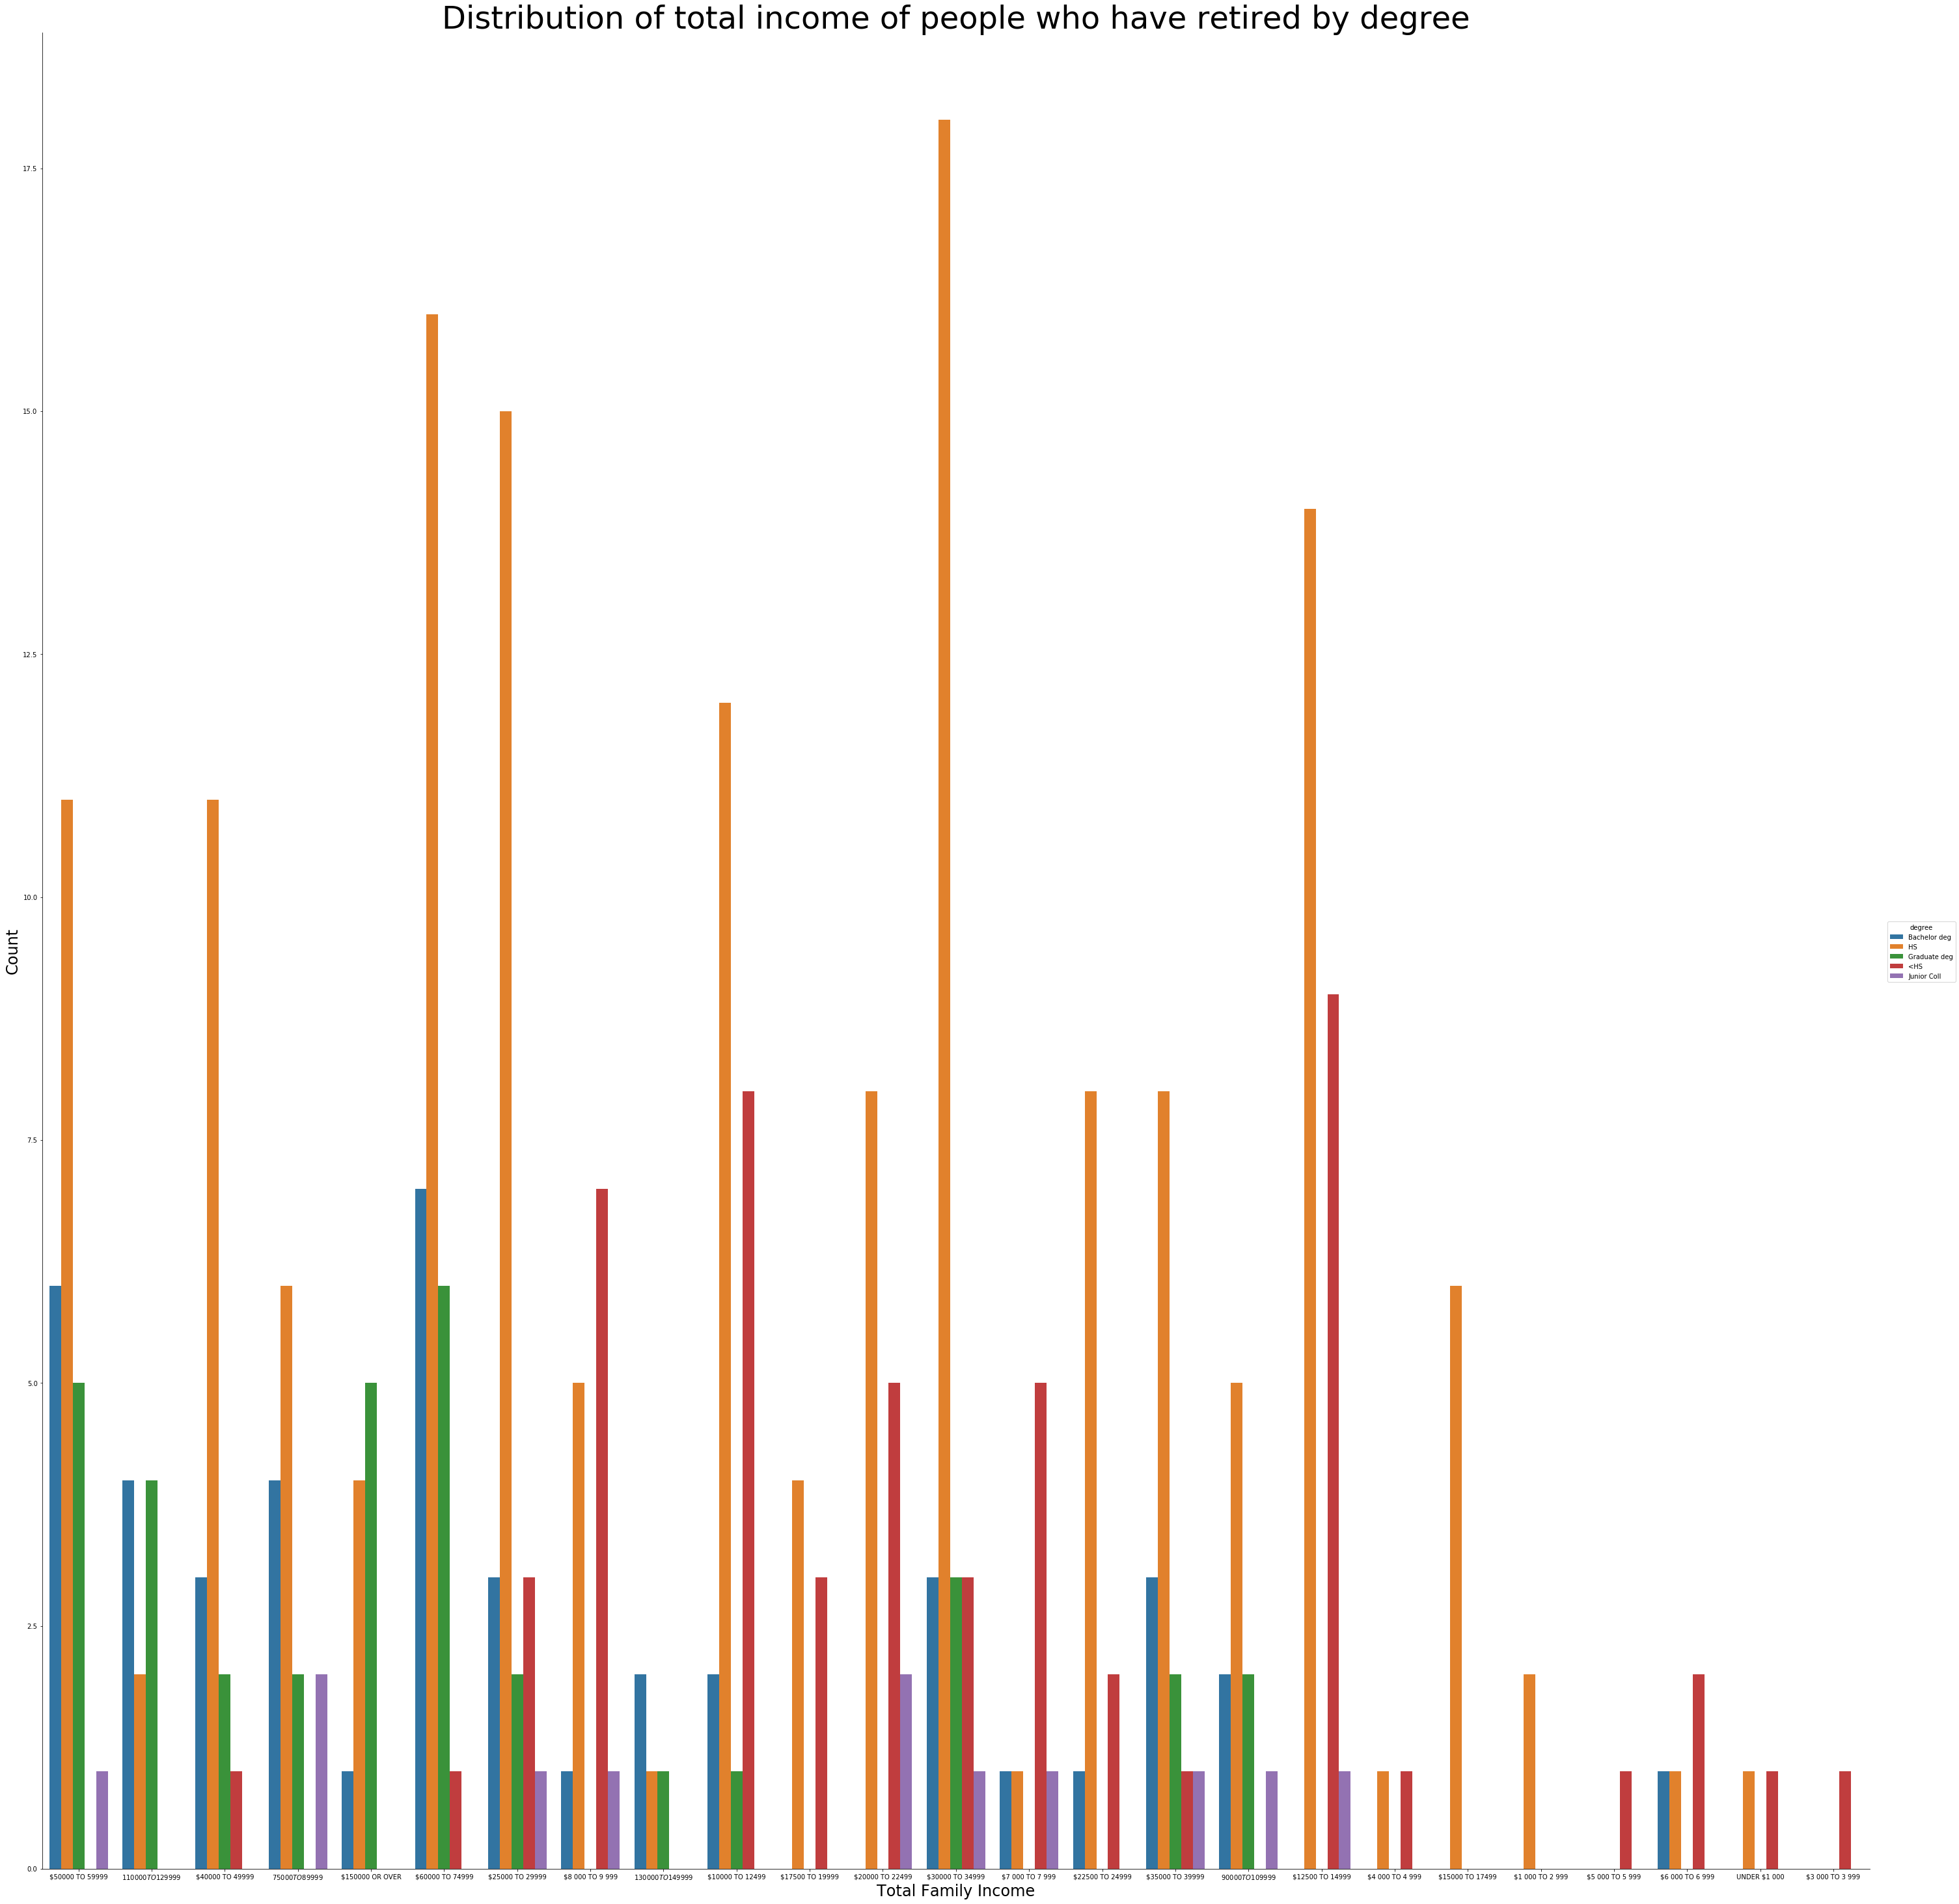

In [50]:
sns.factorplot('income06', kind='count', hue = 'degree', data=gss_retired, size=40)
plt.title("Distribution of total income of people who have retired by degree", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()

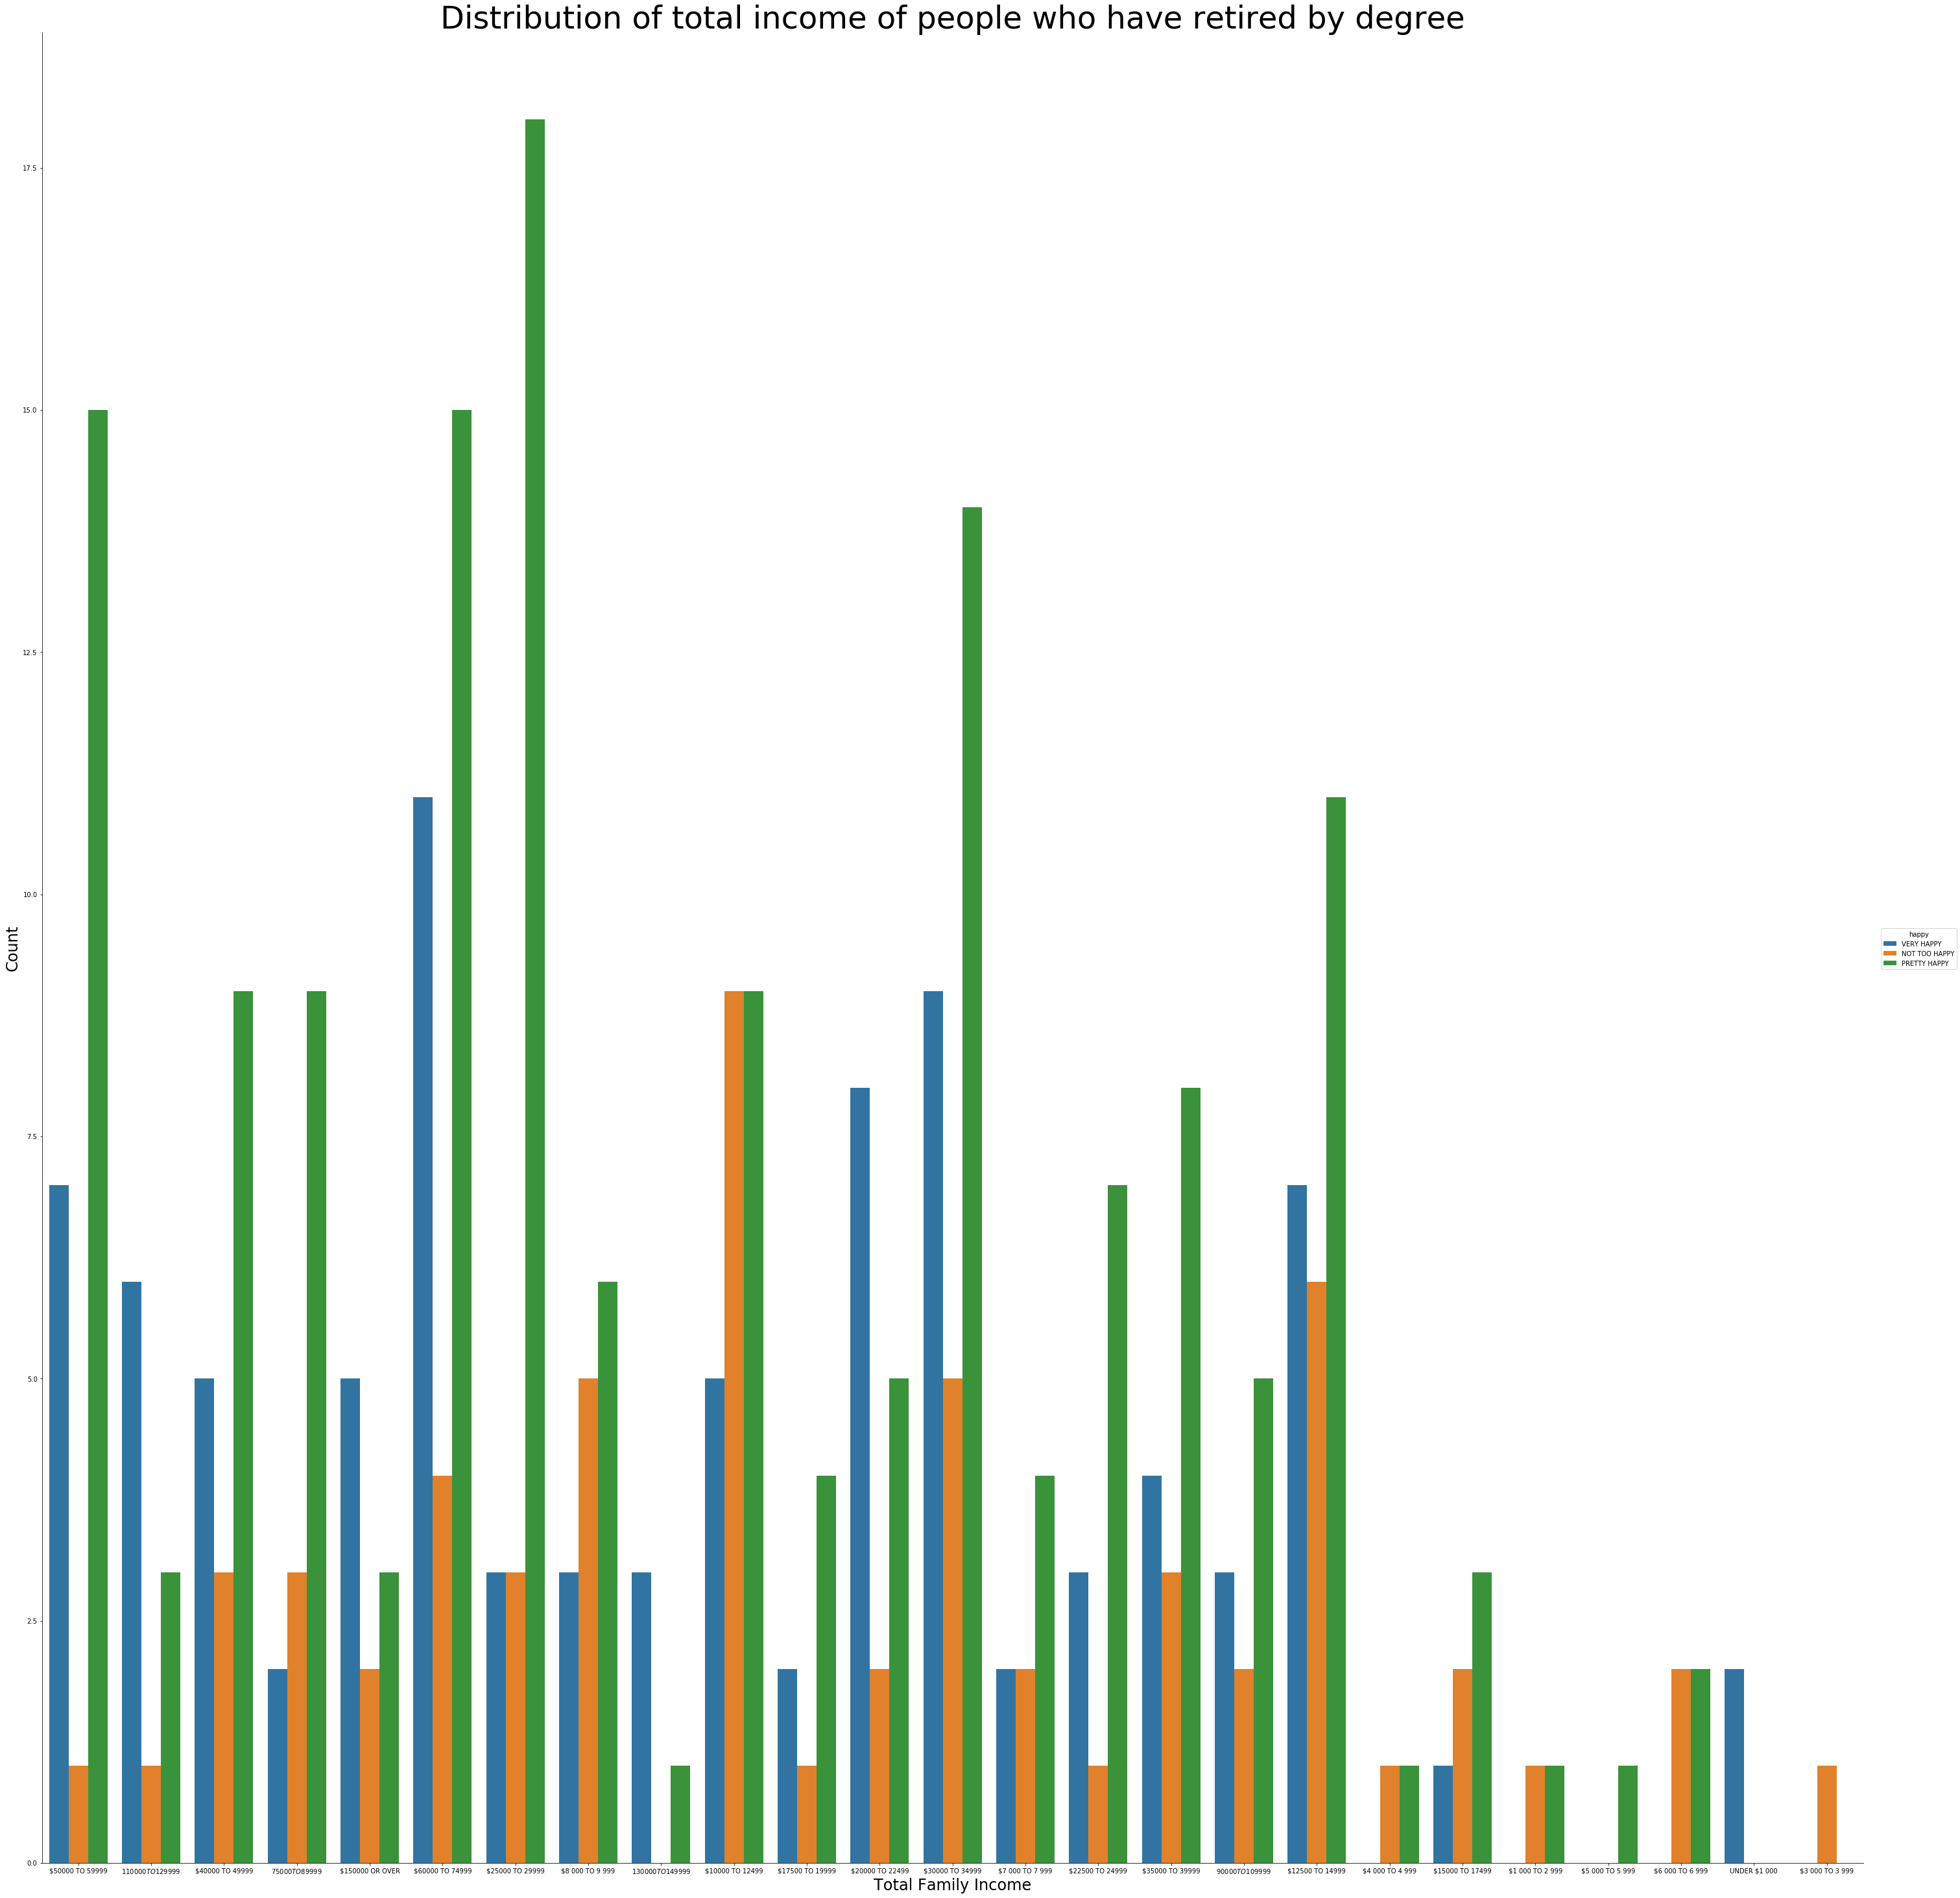

In [51]:
sns.factorplot('income06', kind='count', hue = 'happy', data=gss_retired, size=40)
plt.title("Distribution of total income of people who have retired by degree", fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 24)
plt.ylabel("Count", fontsize = 24)
plt.show()

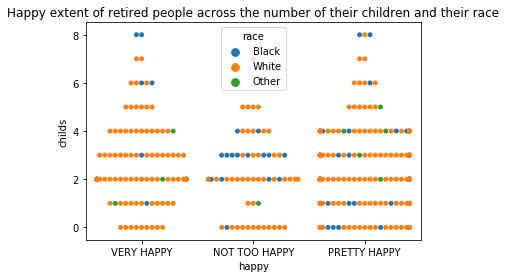

In [129]:
sns.swarmplot(x="happy", y="childs", hue="race", data=gss_retired)
plt.title("Happy extent of retired people across the number of their children and their race")
plt.show()

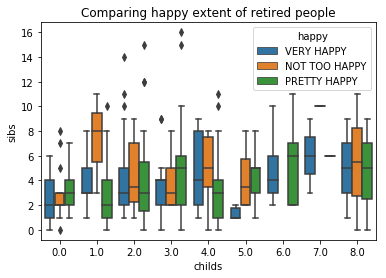

In [132]:
sns.boxplot(x="childs", y="sibs", hue="happy", data=gss_retired)
plt.title("Comparing happy extent of retired people")
plt.show()

The last part of this lab notebook is explorting the relationship between people's income and their voting choice in 2008 president election.

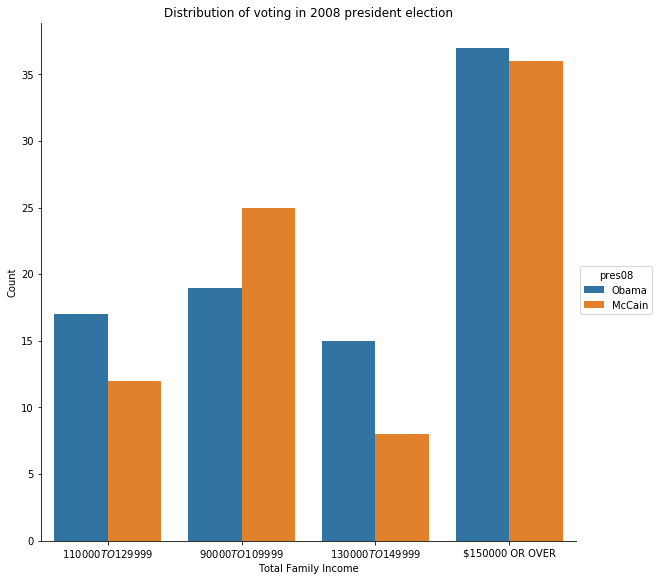

In [53]:
sns.factorplot('income06', kind='count', hue = 'pres08', data=gss_highincome, size =8)
plt.title("Distribution of voting in 2008 president election")
plt.xlabel("Total Family Income", fontsize =10)
plt.ylabel("Count", fontsize =10)
plt.show()

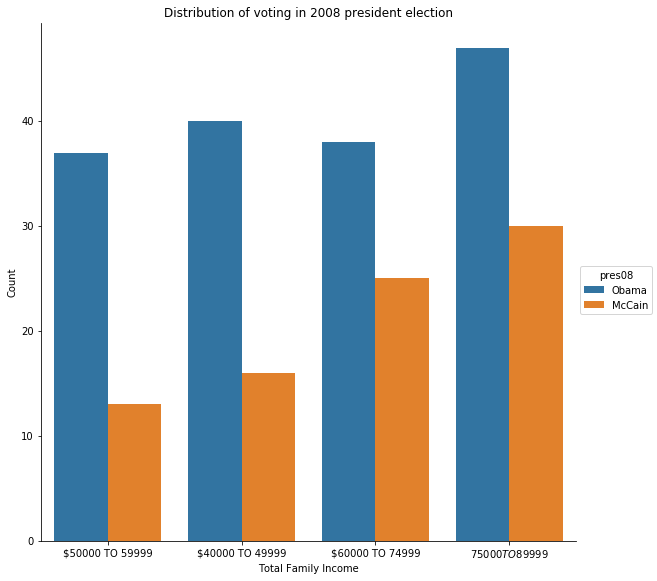

In [54]:
sns.factorplot('income06', kind='count', hue = 'pres08', data=gss_mediumincome, size =8)
plt.title("Distribution of voting in 2008 president election")
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

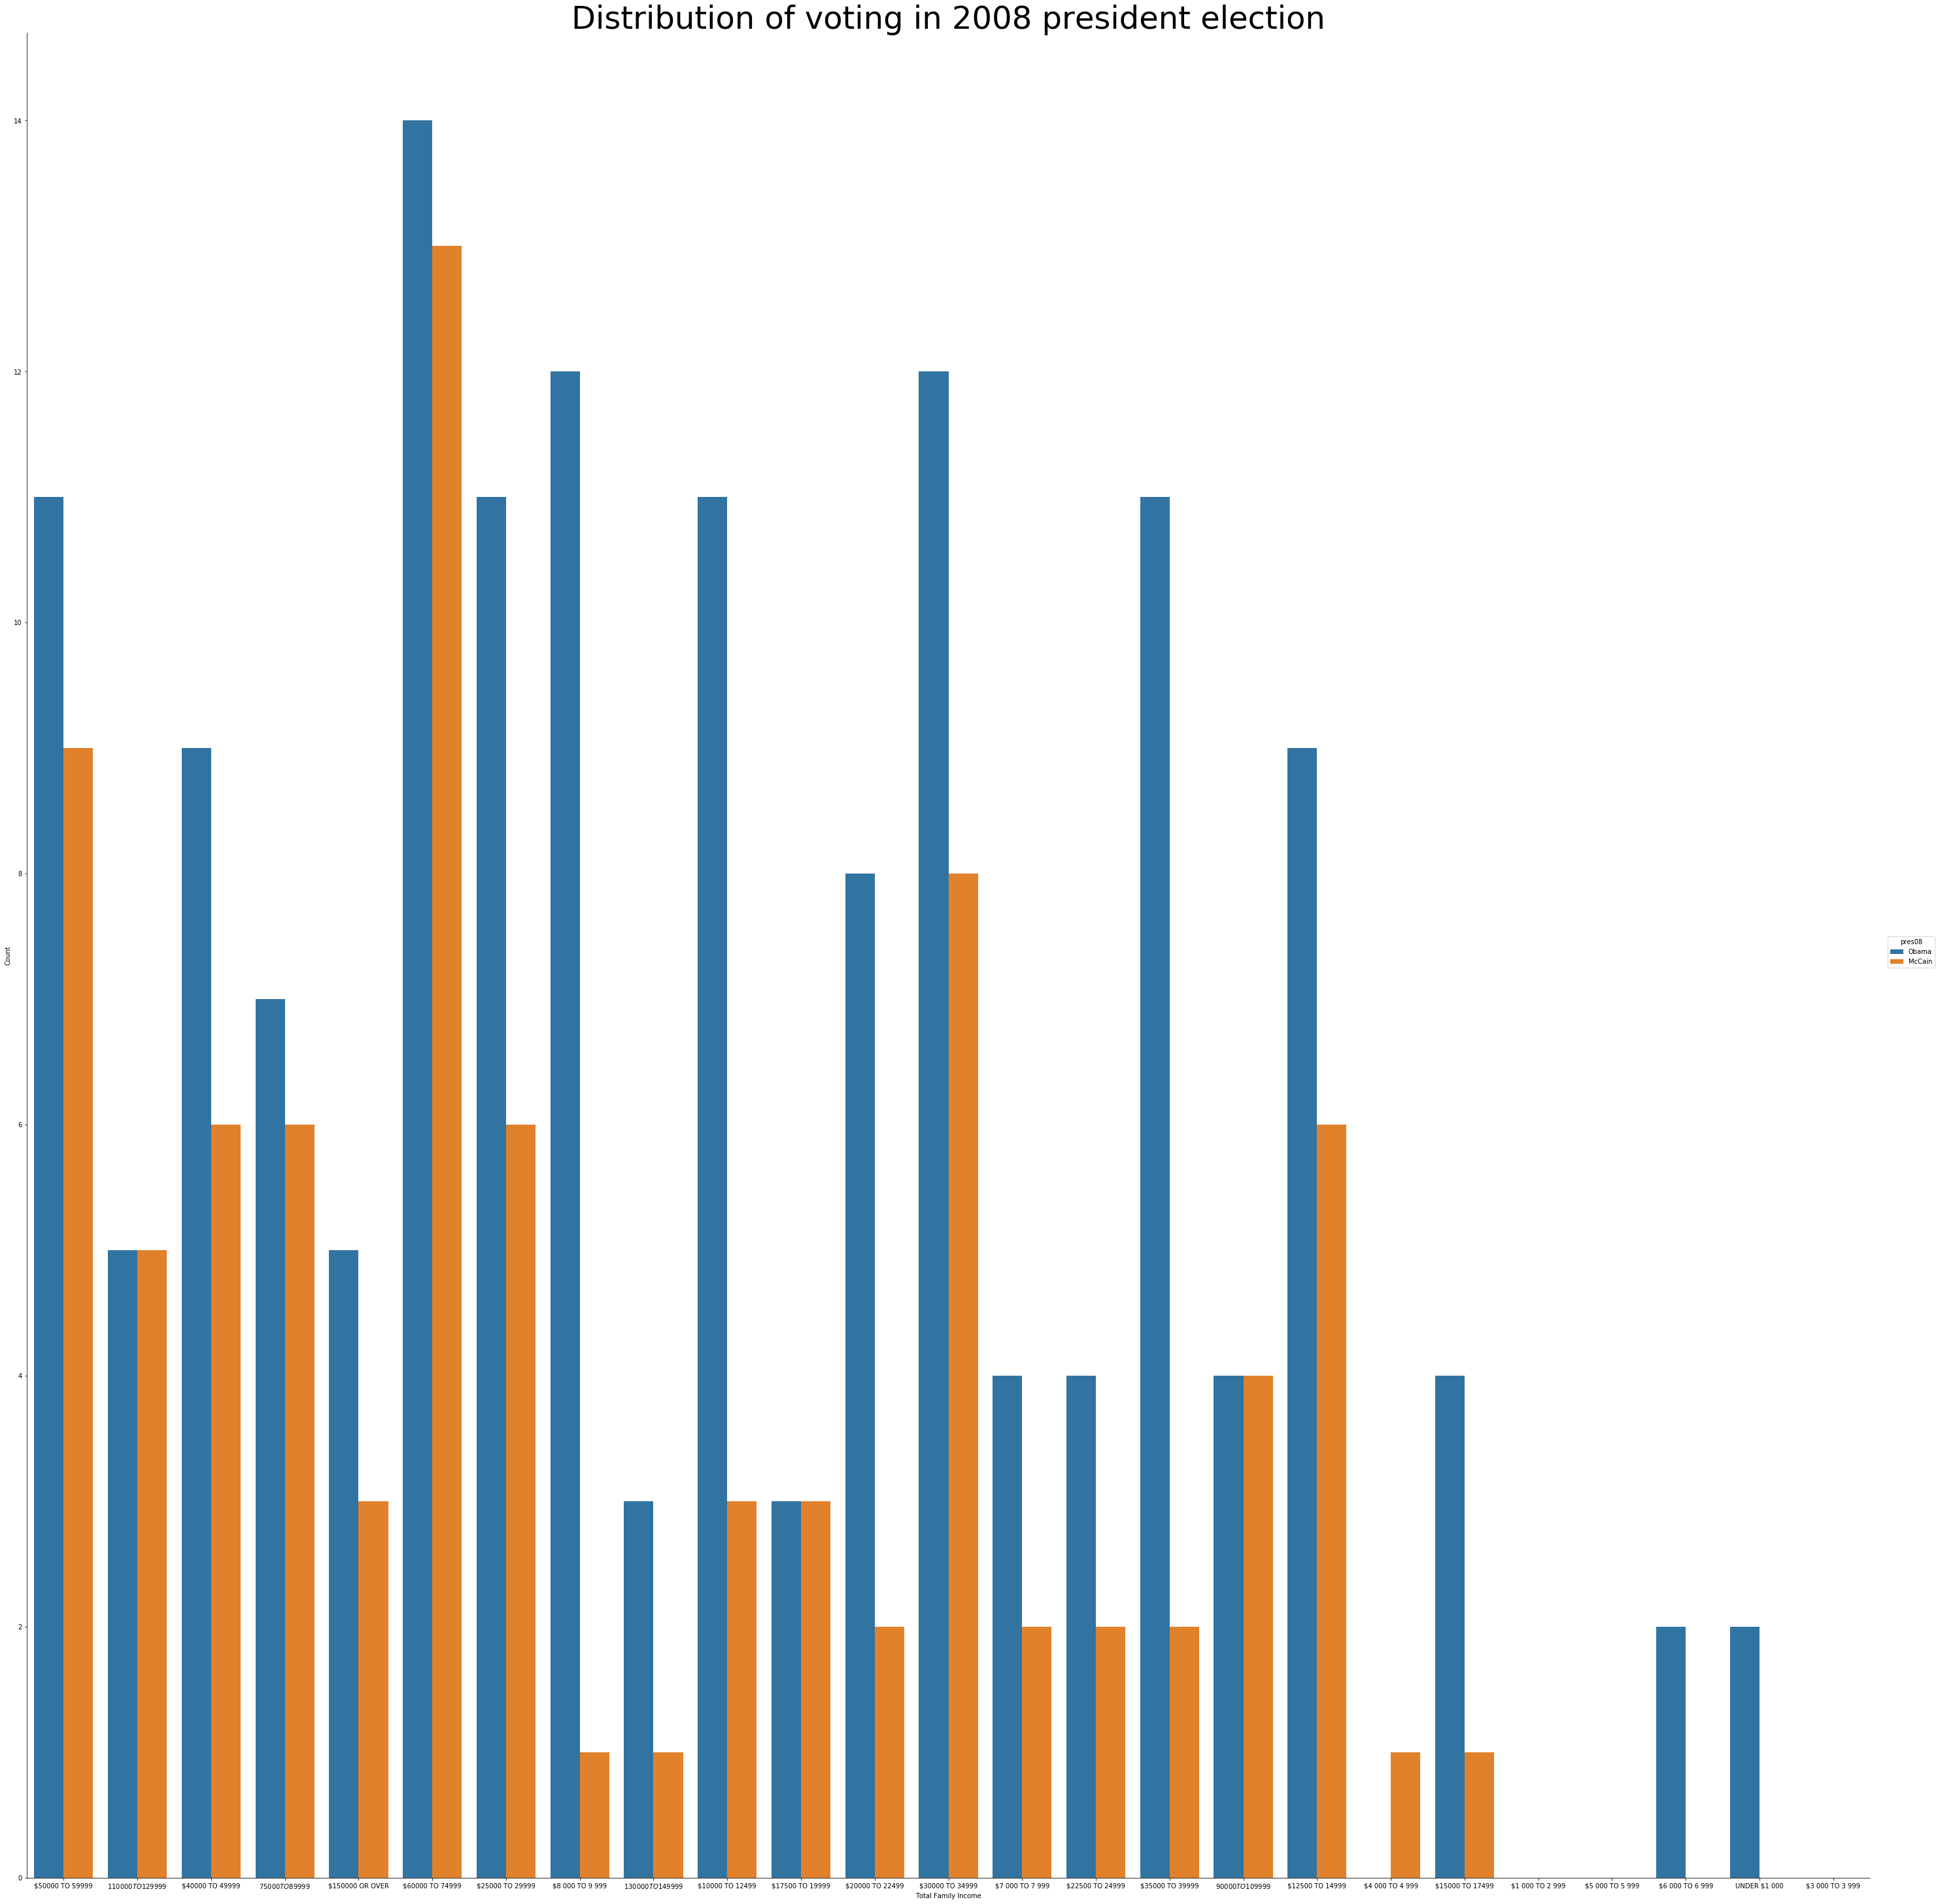

In [57]:
sns.factorplot('income06', kind='count', hue = 'pres08', data=gss_retired, size =40)
plt.title("Distribution of voting in 2008 president election",fontsize = 48)
plt.xlabel("Total Family Income", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()